# Genome Sequence Classification Assignment

## Problem Statement
Training data has been provided in which DNA sequences have been classified  based on whether an unknown motif X occurs repeatedly in a certain region or not. 

Learn the structure and perform this binary classification on test data. 

## Approach
- Since we are dealing with DNA sequences, we use the library Pysster that has been specifically written for biological data.
- Each of A, T, G, C is treated as a one-hot vector. Therefore every sequence is represented as a bit matrix. 
- This is convenient while taking the dot product with the kernel, which is also a one-hot vector.


## Implementation Details

### Preprocessing
Pysster expects data divided by classes, which it then splits into train, test and validate classes in the ratio 70-15-15. We preprocess the data to divide it into two files class0.txt and class1.txt.

In [1]:
ftrain_data = open("data/allData_trn.txt")
ftrain_labels = open("data/allLabels_trn.txt")
fval_data = open("data/allData_val.txt")
fval_labels = open("data/allLabels_val.txt")

In [2]:
train_data = ftrain_data.readlines()
val_data = fval_data.readlines()
train_labels = ftrain_labels.readlines()
val_labels = fval_labels.readlines()

In [3]:
class_0 = []
class_1 = []


In [4]:
for i in range(len(train_data)):
    if train_labels[i] == "0\n":
        class_0.append(">h\n")
        class_0.append(train_data[i])
    else:
        class_1.append(">h\n")
        class_1.append(train_data[i])

In [5]:
for i in range(len(val_data)):
    if val_labels[i] == "0\n":
        class_0.append(">h\n")
        class_0.append(val_data[i])
    else:
        class_1.append(">h\n")
        class_1.append(val_data[i])

In [6]:
f_class0 = open("data/class0.txt", "w")
f_class1 = open("data/class1.txt", "w")

In [7]:
f_class0.writelines(class_0)

In [8]:
f_class1.writelines(class_1)

### Model Creation 
These files are then fed to Pysster to make a data object. 

In [62]:
from pysster.Data import Data
from pysster.Model import Model

### Creating the Data object

In [10]:
data = Data(["data/class0.txt", "data/class1.txt"], ("ATGC"))

### Picking the Hyperparameters
We run a 1 dimensional CNN with the following hyperparameters:
- *Number of Layers*: There are two "structures" we want this convolutional Neural Network to recognise. The first one is the pattern of the motif itself, and the second is whether there are repeating motifs. Hence, we pick two layers of CNN. 
- *Length of the kernel*: The size of a motif is generally of length 5-20 base pairs. I picked a kernel of length 25 to be able to capture any type of motif.  
- *Number of Kernels*: Picked by trial and error
- *Epochs*: Picked by trial and error so as to not overfit. 

We then train the model.

In [11]:
params = {"conv_num": 2, "kernel_num": 20, "epochs":20}
model = Model(params, data)
model.train(data)




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
44/44 [==============================] - 10s 223ms/step - loss: 0.8441 - val_loss: 0.6946
Epoch 2/20
44/44 [==============================] - 8s 186ms/step - loss: 0.8386 - val_loss: 0.6802
Epoch 3/20
44/44 [==============================] - 8s 176ms/step - loss: 0.6926 - val_loss: 0.3185
Epoch 4/20
44/44 [==============================] - 8s 173ms/step - loss: 0.2862 - val_loss: 0.1062
Epoch 5/20
44/44 [==============================] - 8s 174ms/step - loss: 0.1793 - val_loss: 0.0772
Epoch 6/20
44/44 [==============================] - 8s 174ms/step - loss: 0.1471 - val_loss: 0.0762
Epoch 7/20
44/44 [==============================] - 8s 175ms/step - loss: 0.1264 - val_loss: 0.0827
Epoch 8/20
44/44 [==============================] - 8s 178ms/step - loss: 0.1226 - 

### Training Curves
#### Validation loss vs epochs: Blue
#### Training loss vs epochs: Orange

<IPython.core.display.Javascript object>


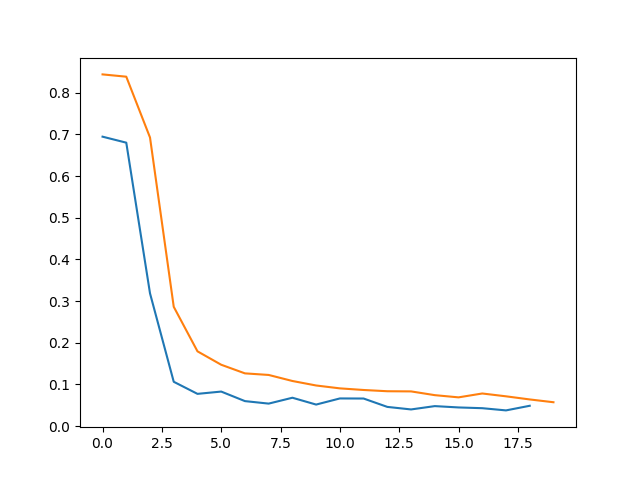

In [45]:
%matplotlib notebook

from matplotlib.pyplot import plot, show
validation_losses = [0.6946, 0.6802, 0.3185, 0.1062, 0.0772, 0.0827, 0.0598, 0.0538, 0.0679, 0.0515, 0.0662, 0.0660, 0.0459, 0.0398, 0.0478, 0.0446, 0.0428, 0.0375, 0.0486]
plot(validation_losses)
show()

training_losses = [0.8441, 0.8386, 0.6926, 0.2862, 0.1793, 0.1471, 0.1264, 0.1226, 0.1081, 0.0973, 0.0904, 0.0865, 0.0835, 0.0831, 0.0741, 0.0688, 0.0781, 0.0713, 0.0638, 0.0571]
plot(training_losses)
show()

### Predictions
We predict the labels on the test data and compute accuracy

In [12]:
prediction_weights = model.predict(data, "test")

In [13]:
labels = data.get_labels("test")

In [14]:
import numpy as np
predictions = []
for i in prediction_weights:
    if (i[0] > 0.5):
        predictions.append([1, 0])
    else:
        predictions.append([0, 1])
        
predictions = np.array(predictions)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(labels[:,1], predictions[:, 1])

0.9891666666666666

### Accuracy: 0.9891

In [32]:
from pysster import utils
from IPython.display import Image
import os
output_folder = "outputs/"
if not os.path.isdir(output_folder):
    os.makedirs(output_folder)
    

### AUC - ROC curve (Receiver Operating Characteristics)

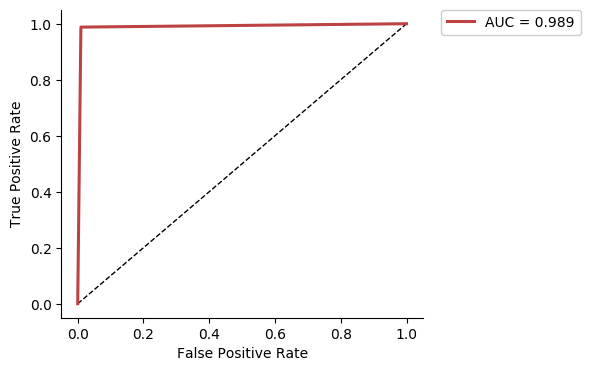

In [33]:
utils.plot_roc(labels, predictions, output_folder+"roc.png")
Image(output_folder+"roc.png")

### AUPRC Curve (Precision-Recall curve)

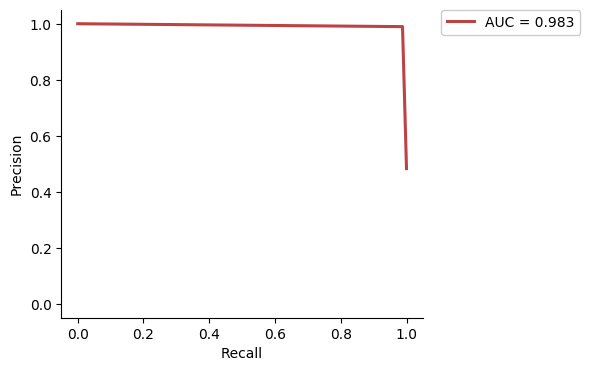

In [36]:
utils.plot_prec_recall(labels, predictions, output_folder+"prec.png")
Image(output_folder+"prec.png")

## Performance Table

In [38]:
print(utils.get_performance_report(labels, predictions))

             precision    recall  f1-score   roc-auc    pr-auc          n
     class_0     0.990     0.988     0.989     0.989     0.983  |     579
     class_1     0.989     0.990     0.990     0.989     0.983  |     621


weighted avg     0.989     0.989     0.989     0.989     0.983  |        




### F1 Score: 0.989

### Visualisation and Interpretation

<IPython.core.display.Javascript object>


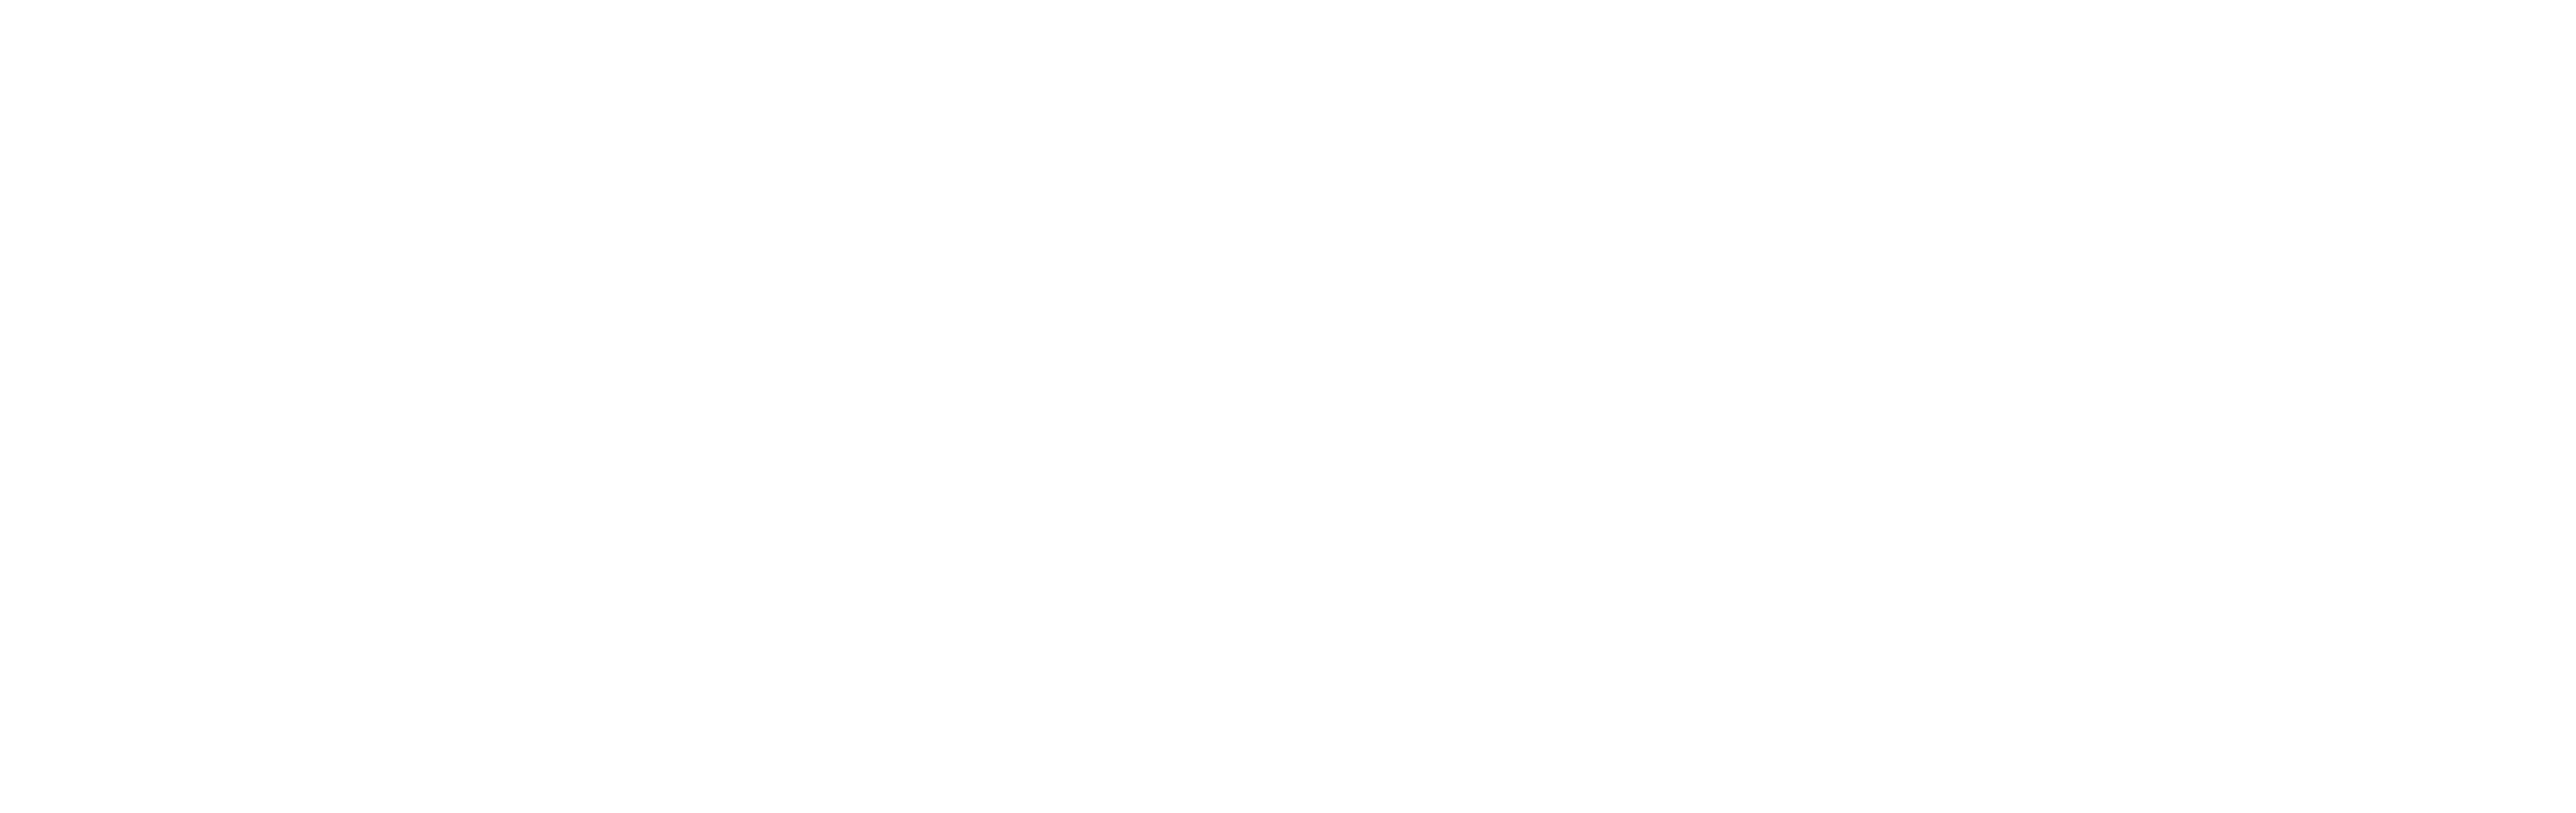

<IPython.core.display.Javascript object>


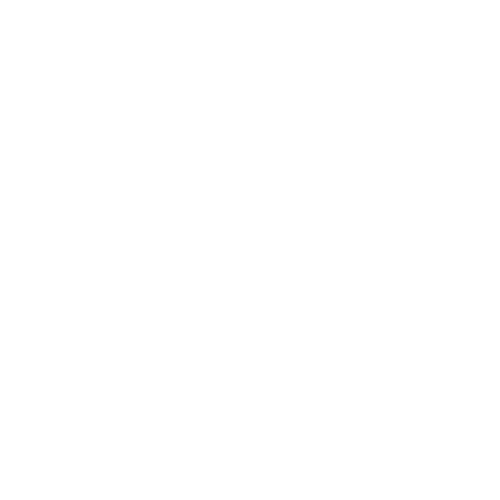

<IPython.core.display.Javascript object>


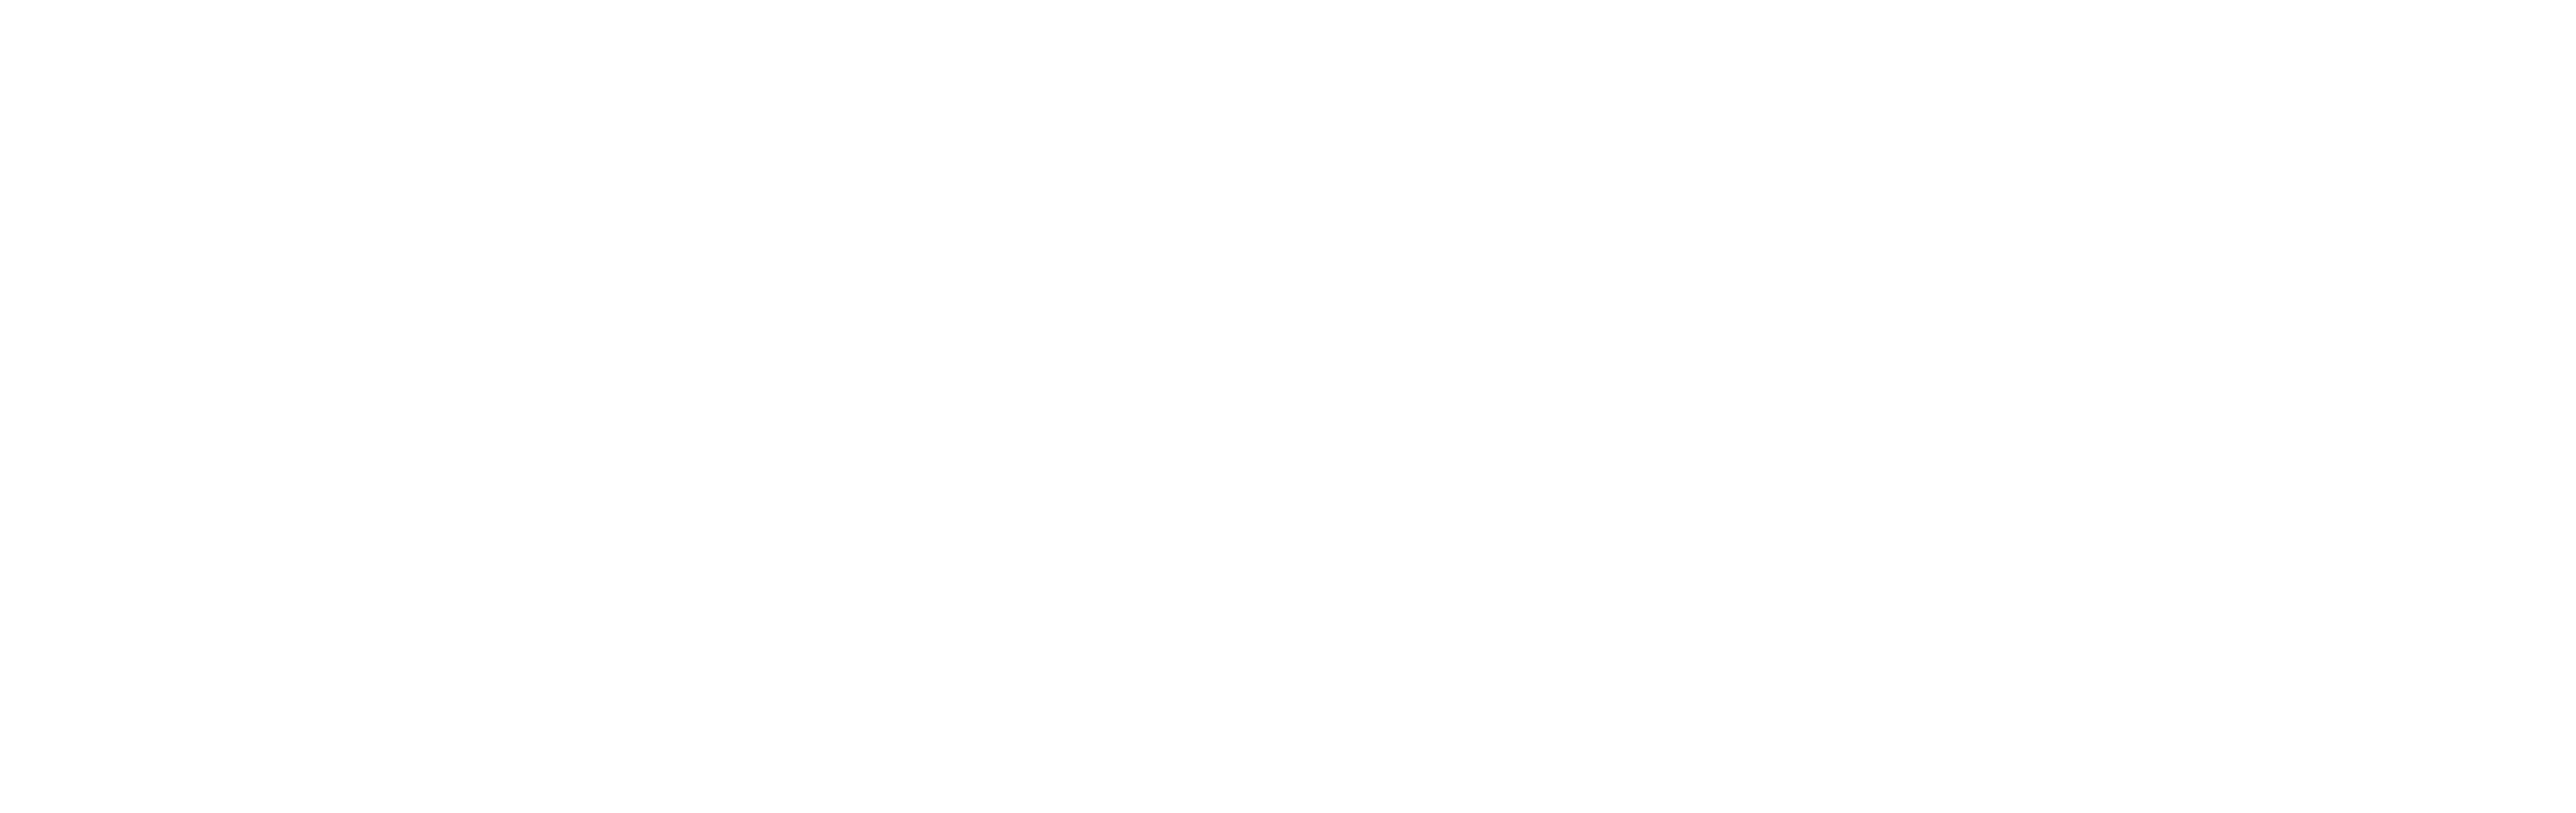

<IPython.core.display.Javascript object>


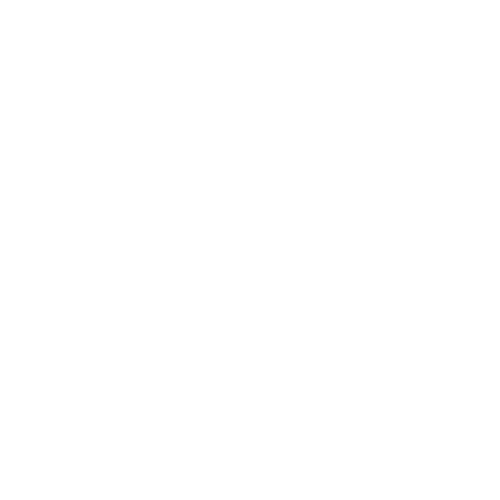

<IPython.core.display.Javascript object>


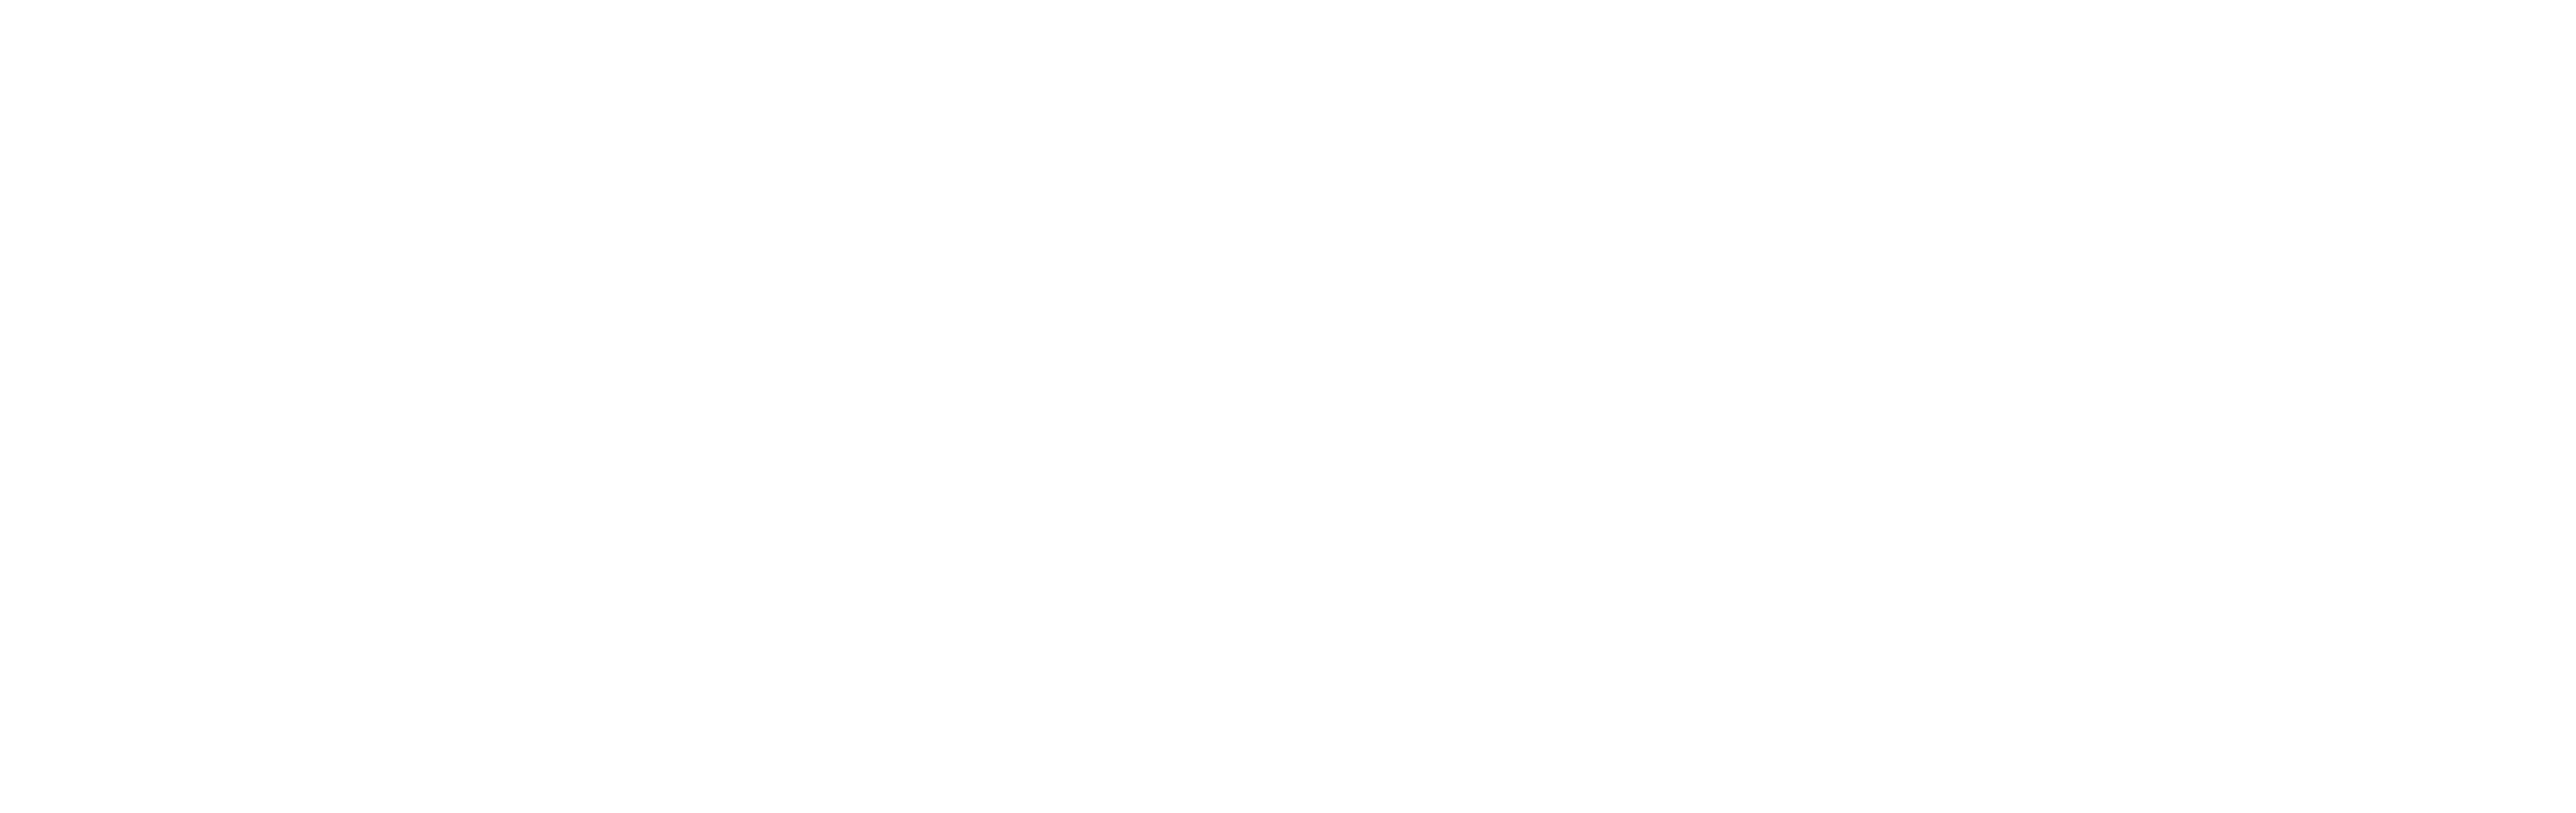

<IPython.core.display.Javascript object>


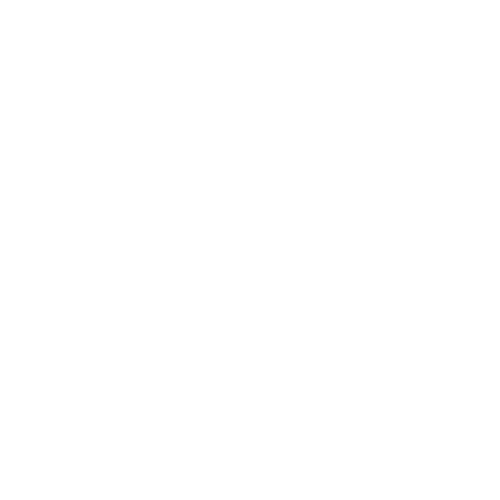

<IPython.core.display.Javascript object>


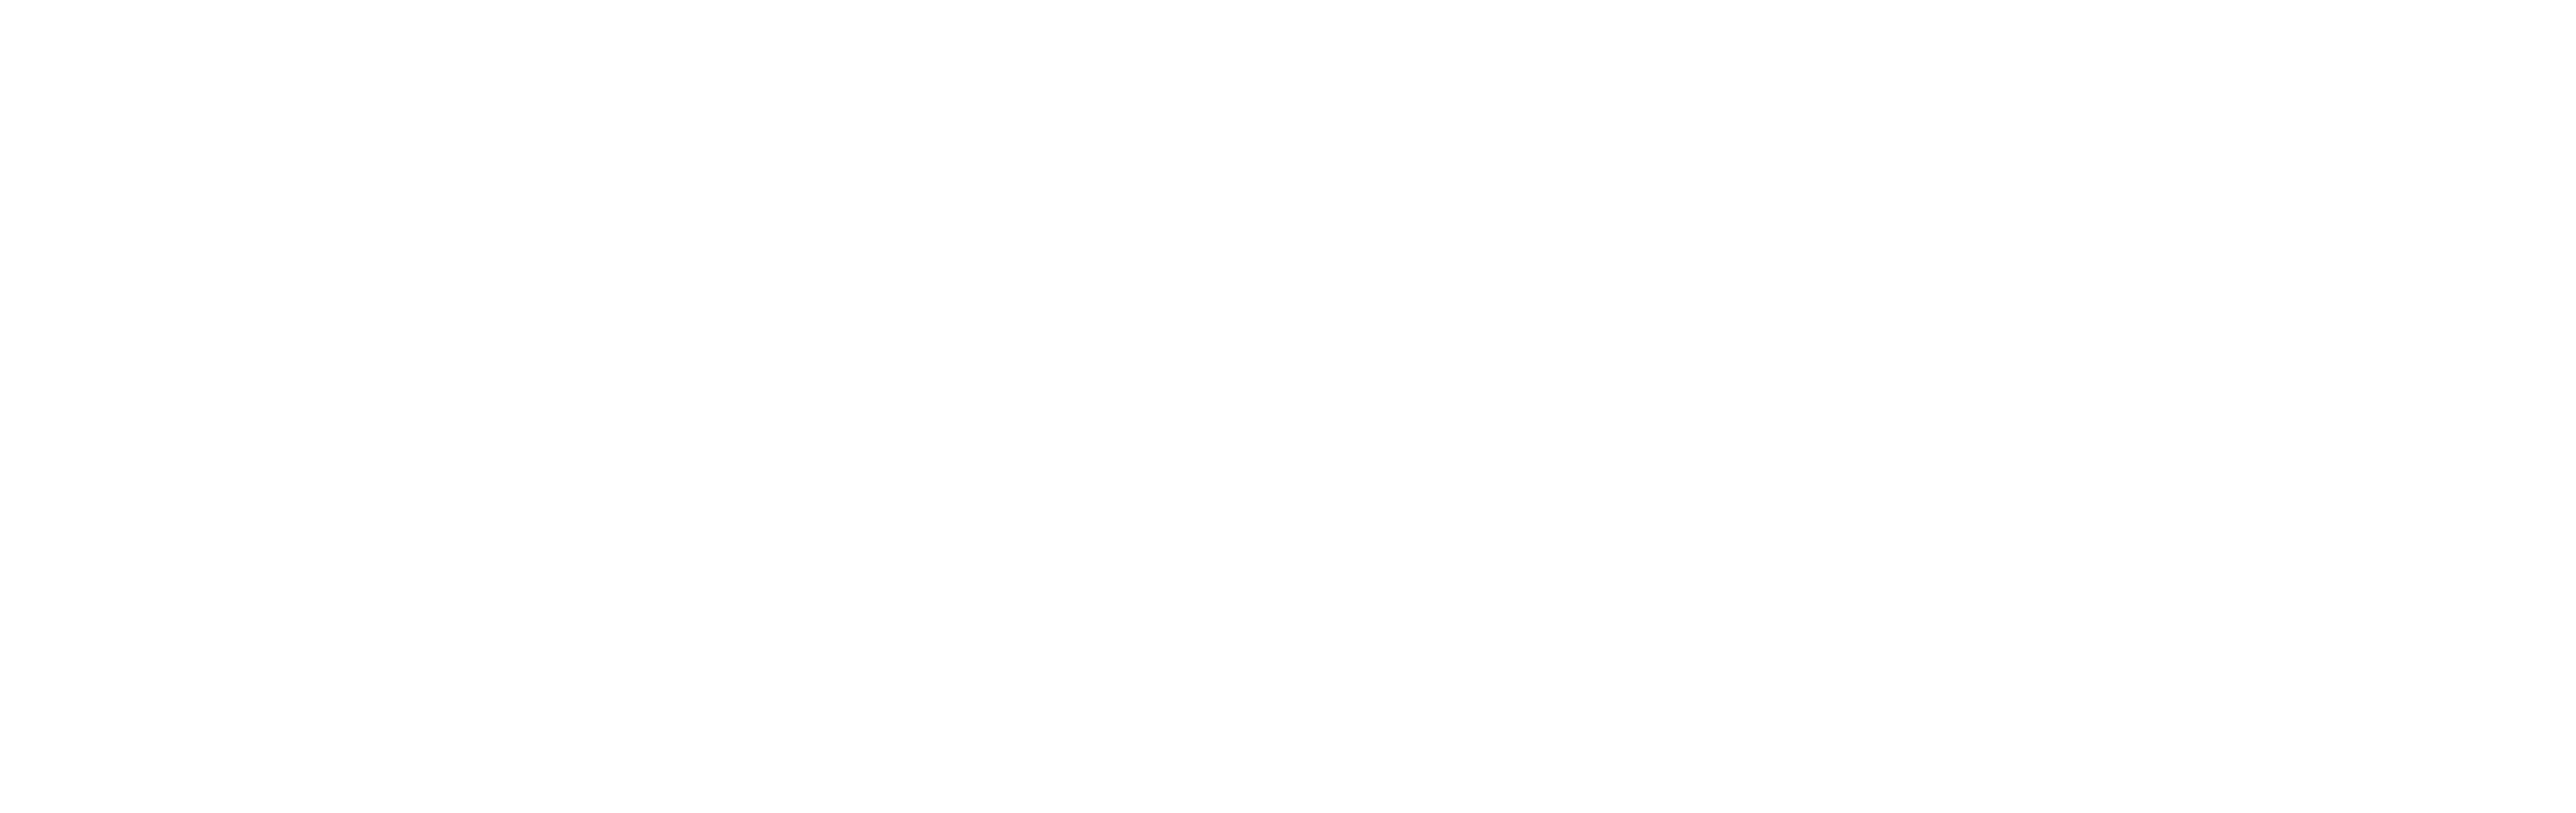

<IPython.core.display.Javascript object>


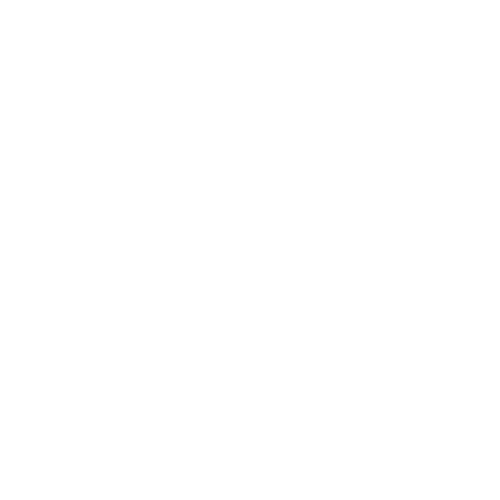

<IPython.core.display.Javascript object>


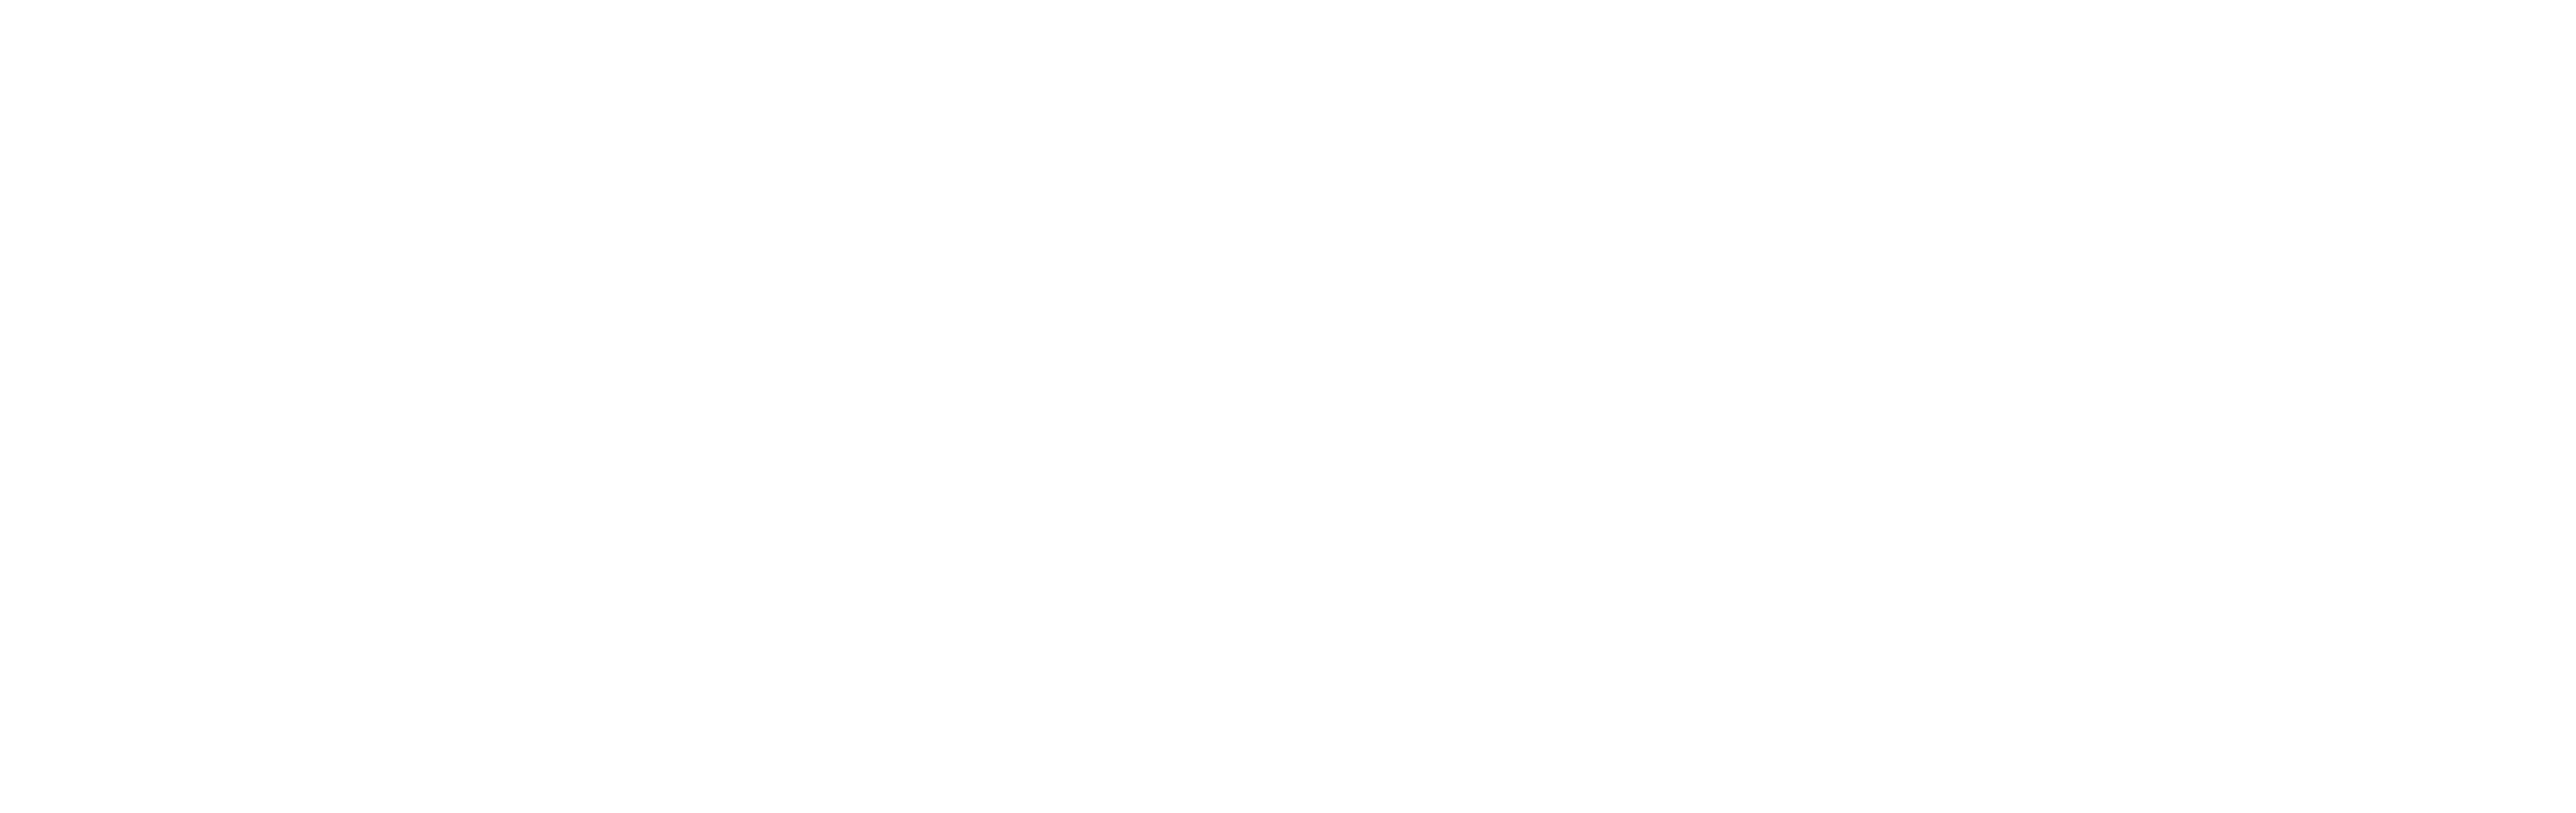

<IPython.core.display.Javascript object>


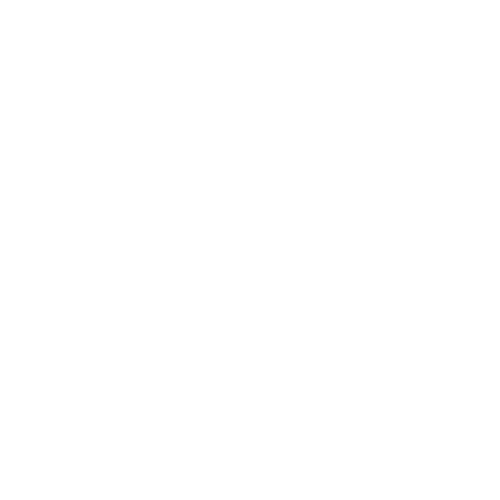

<IPython.core.display.Javascript object>


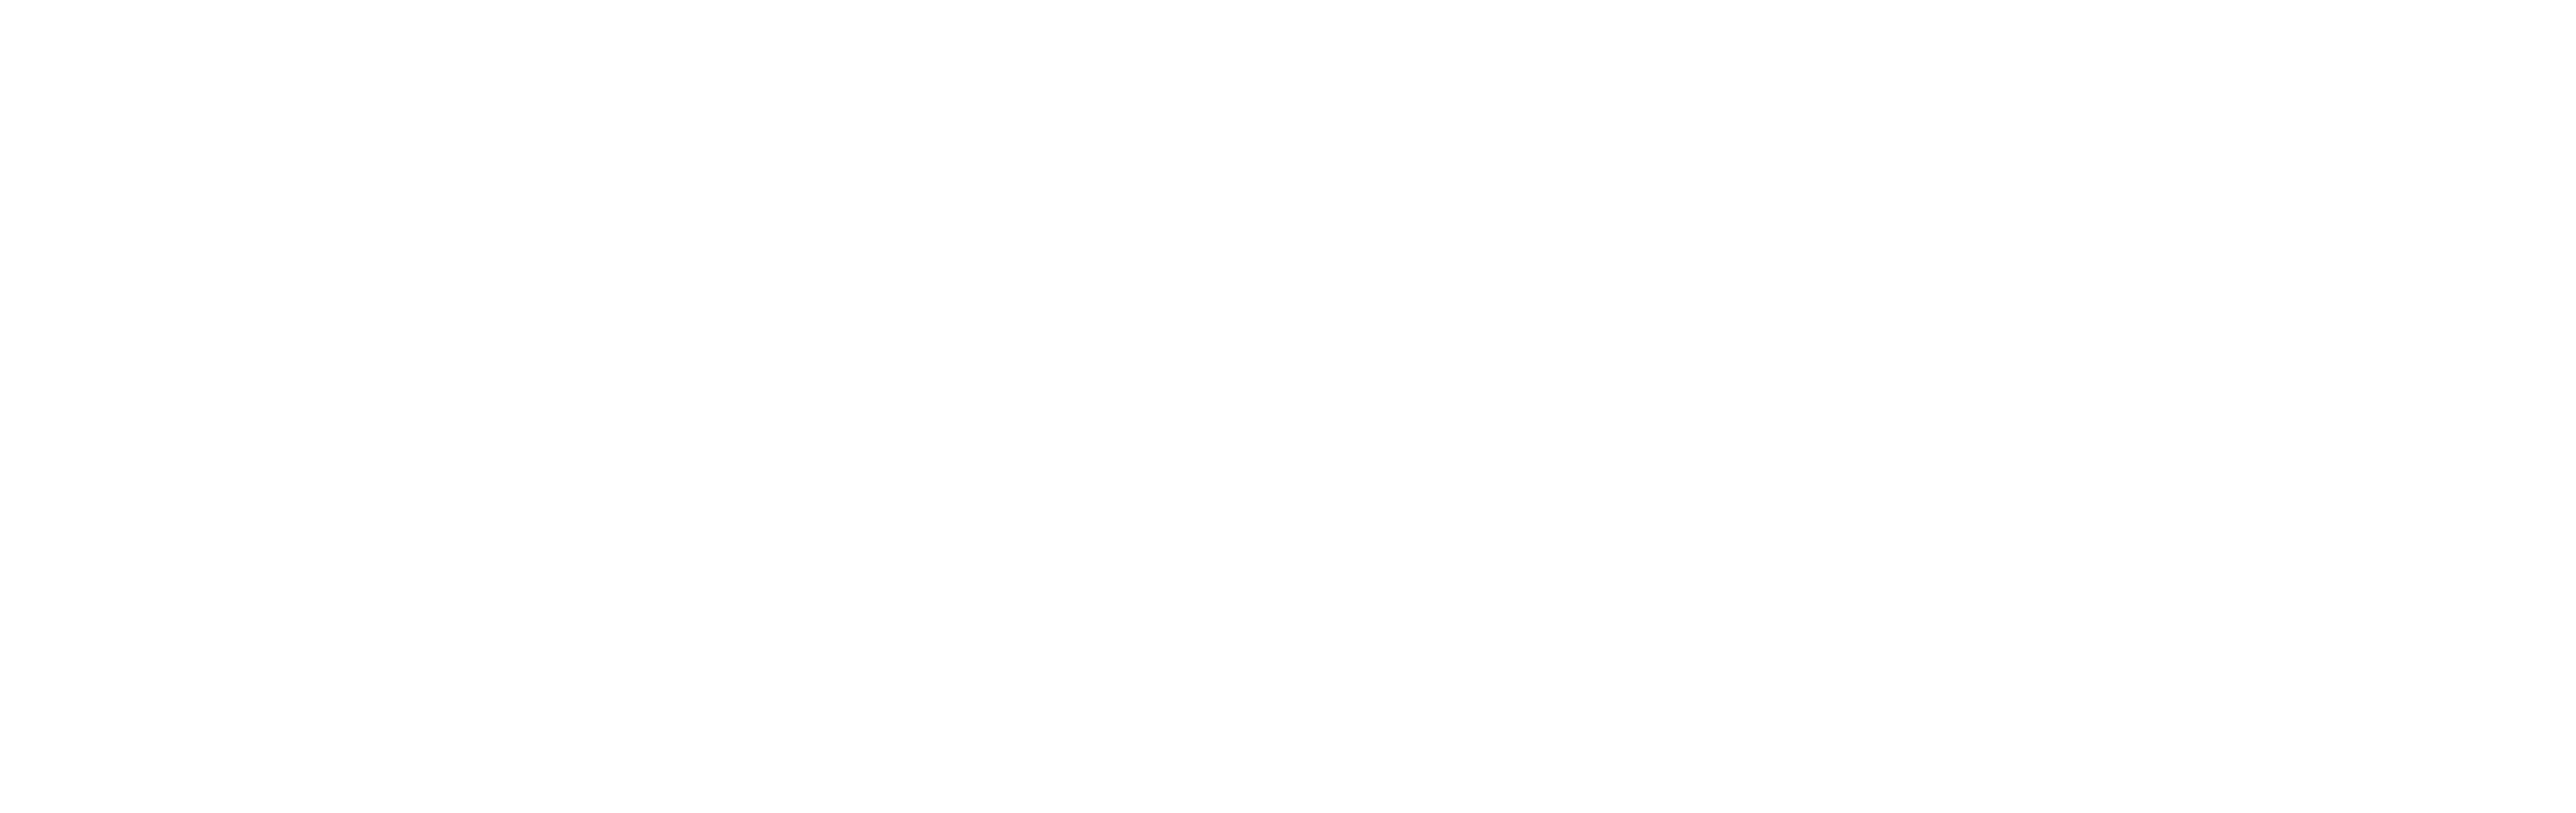

<IPython.core.display.Javascript object>


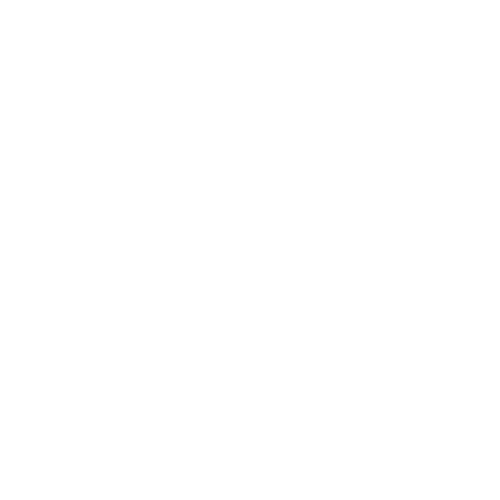

<IPython.core.display.Javascript object>


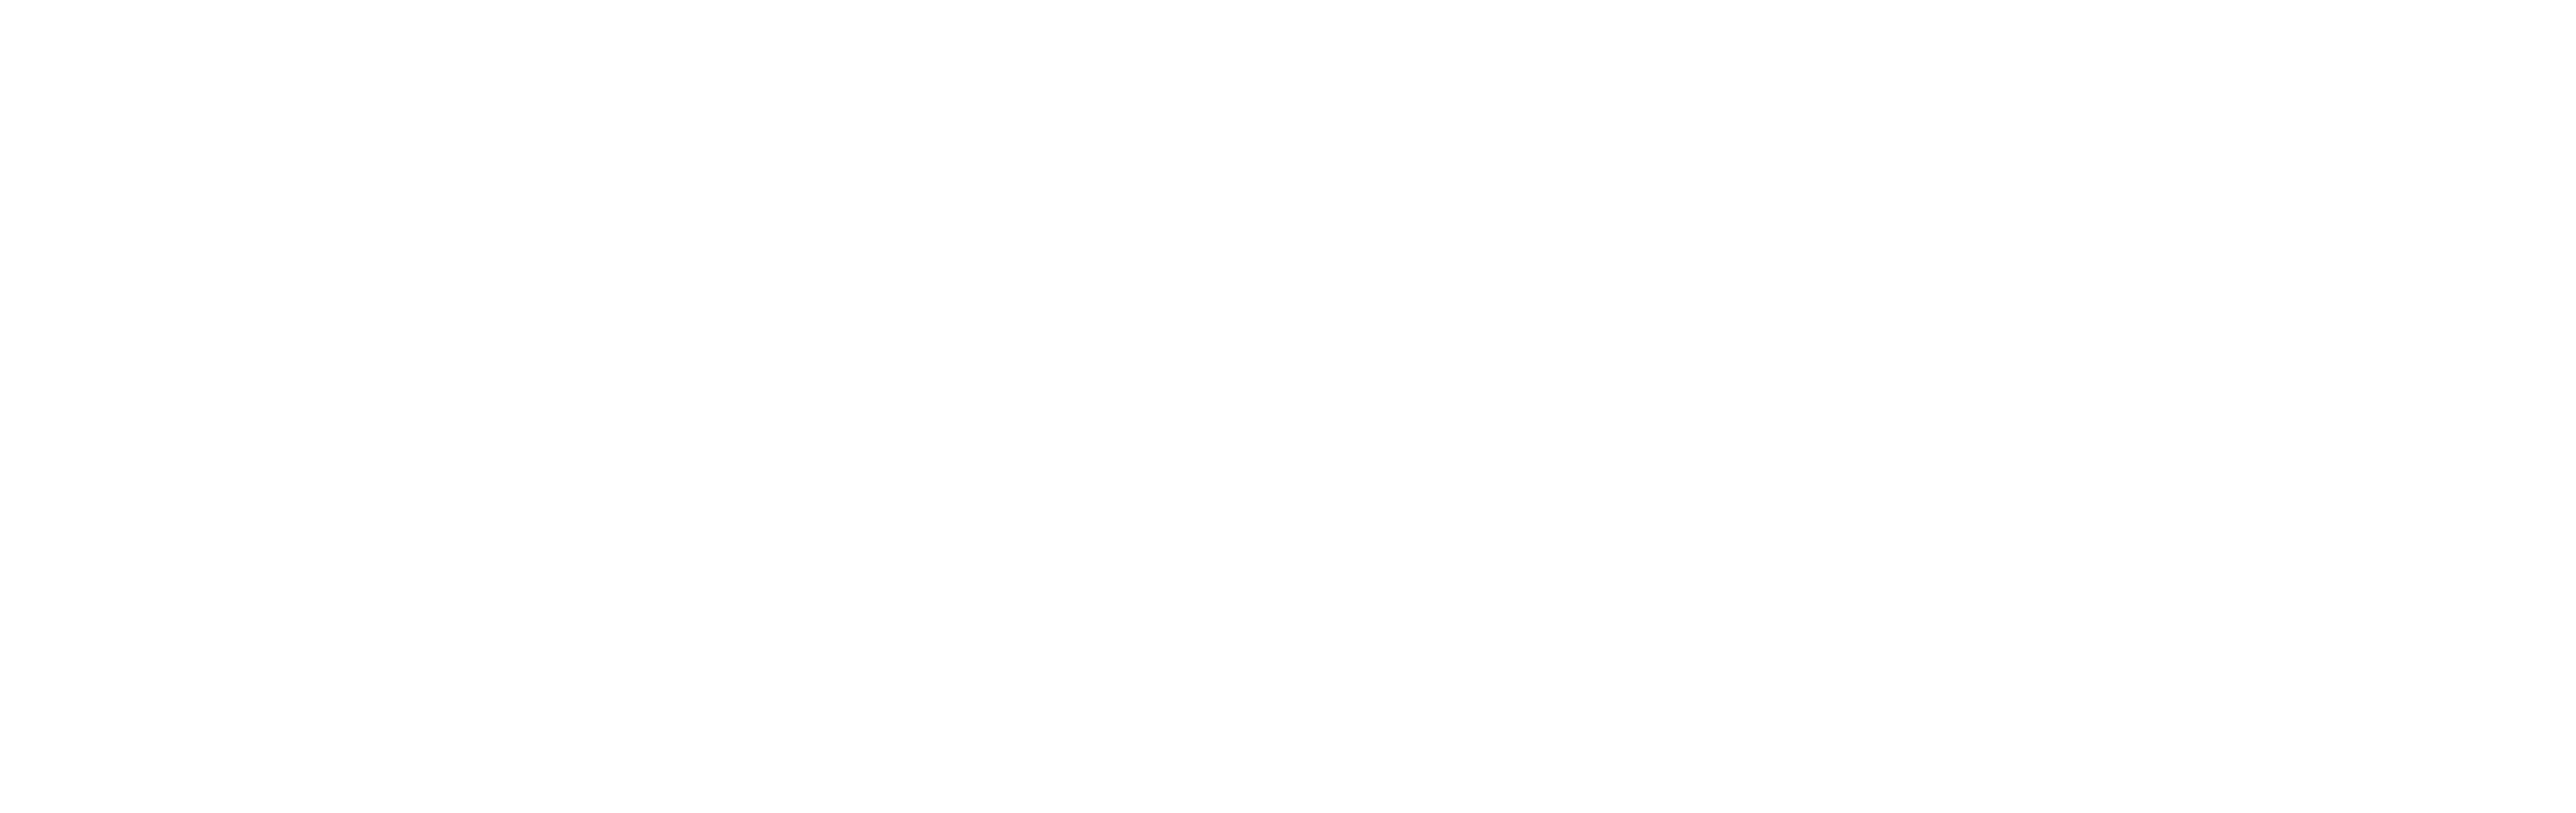

<IPython.core.display.Javascript object>


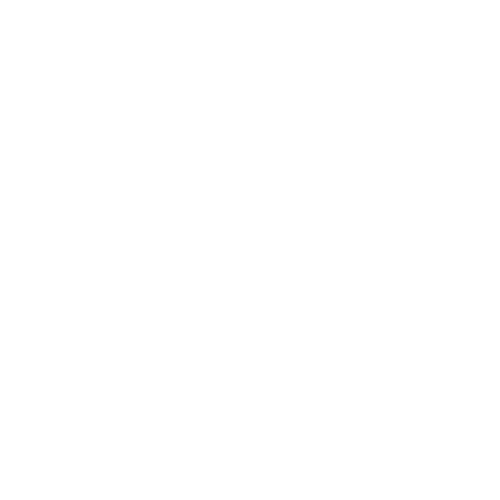

<IPython.core.display.Javascript object>


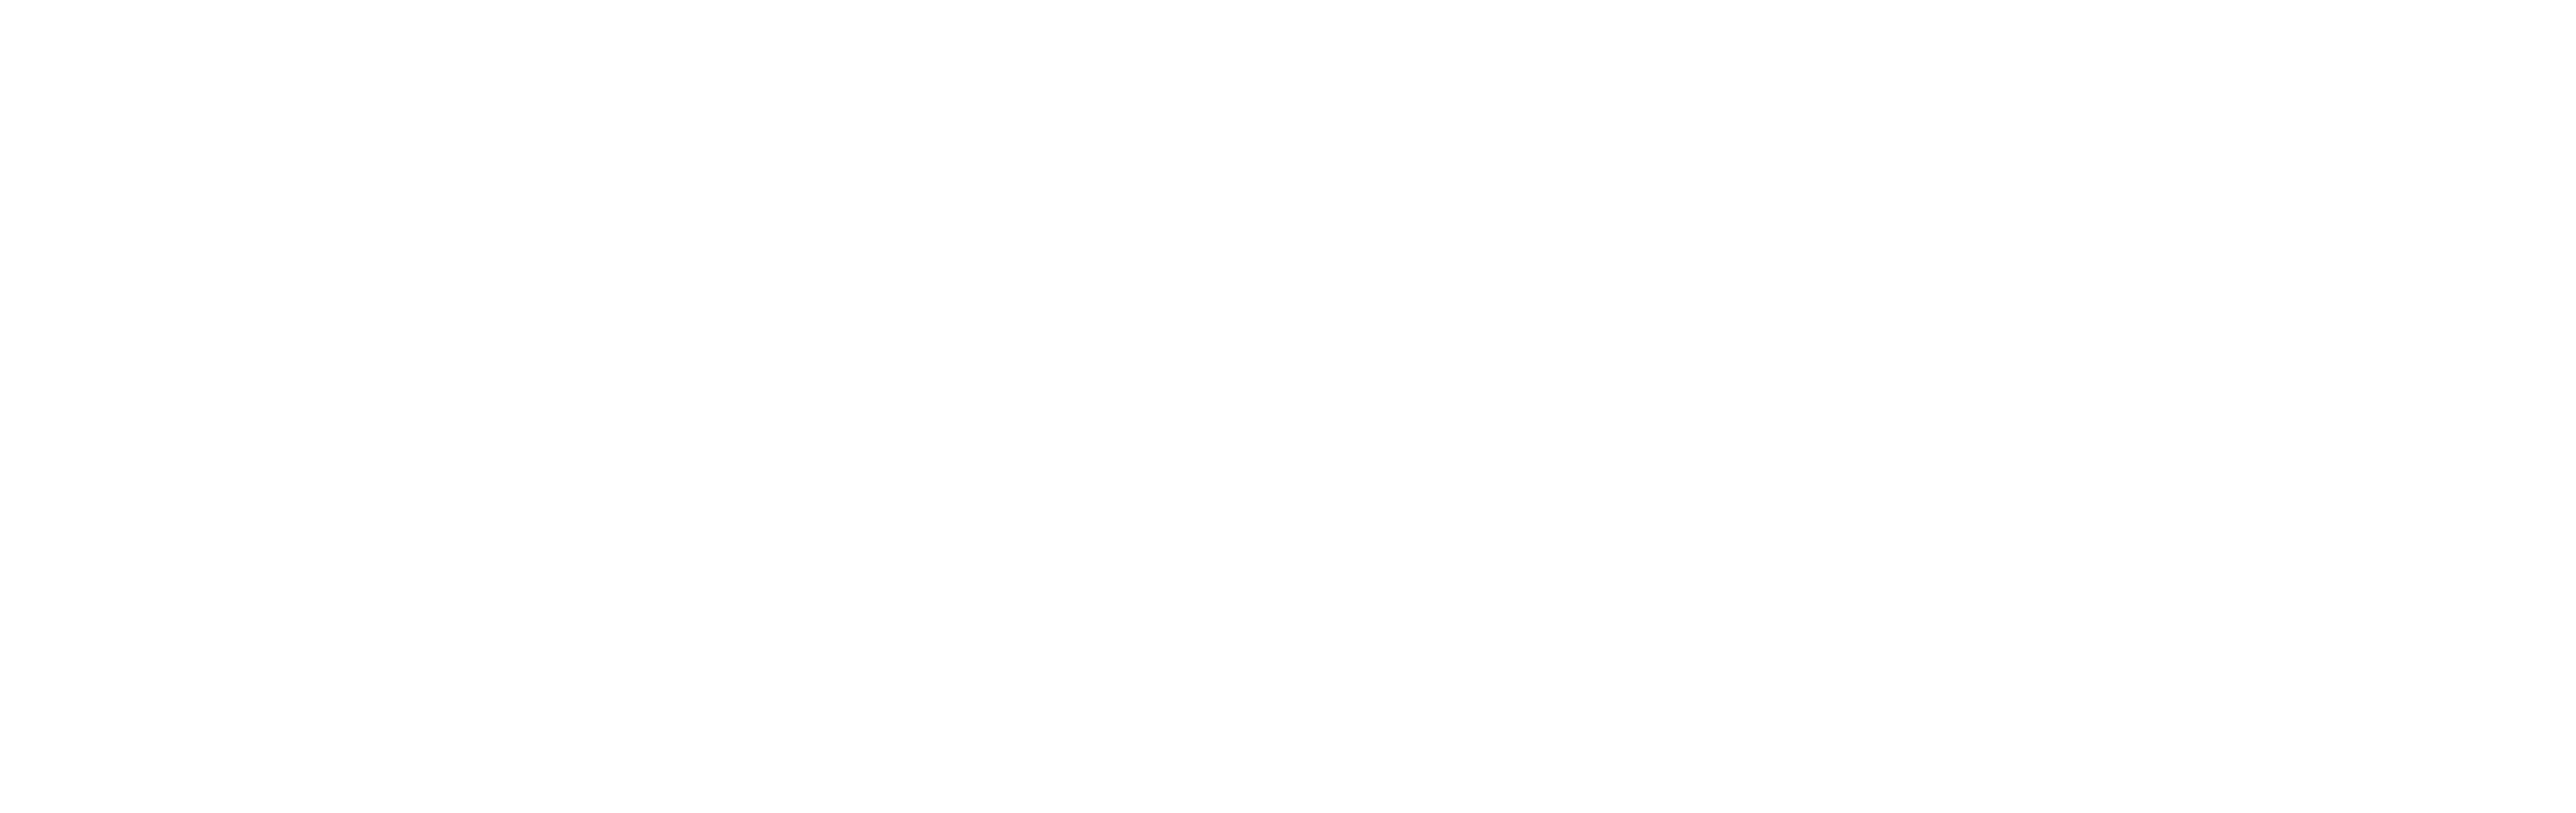

<IPython.core.display.Javascript object>


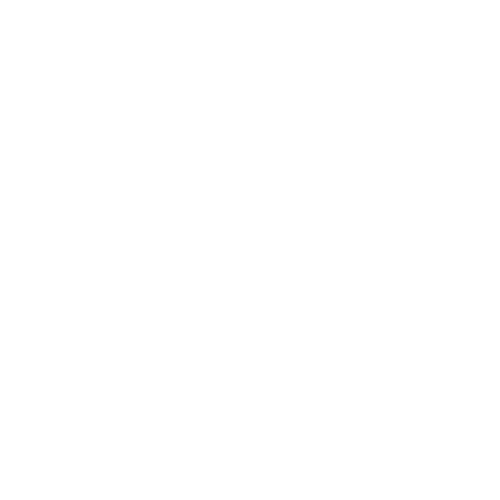

<IPython.core.display.Javascript object>


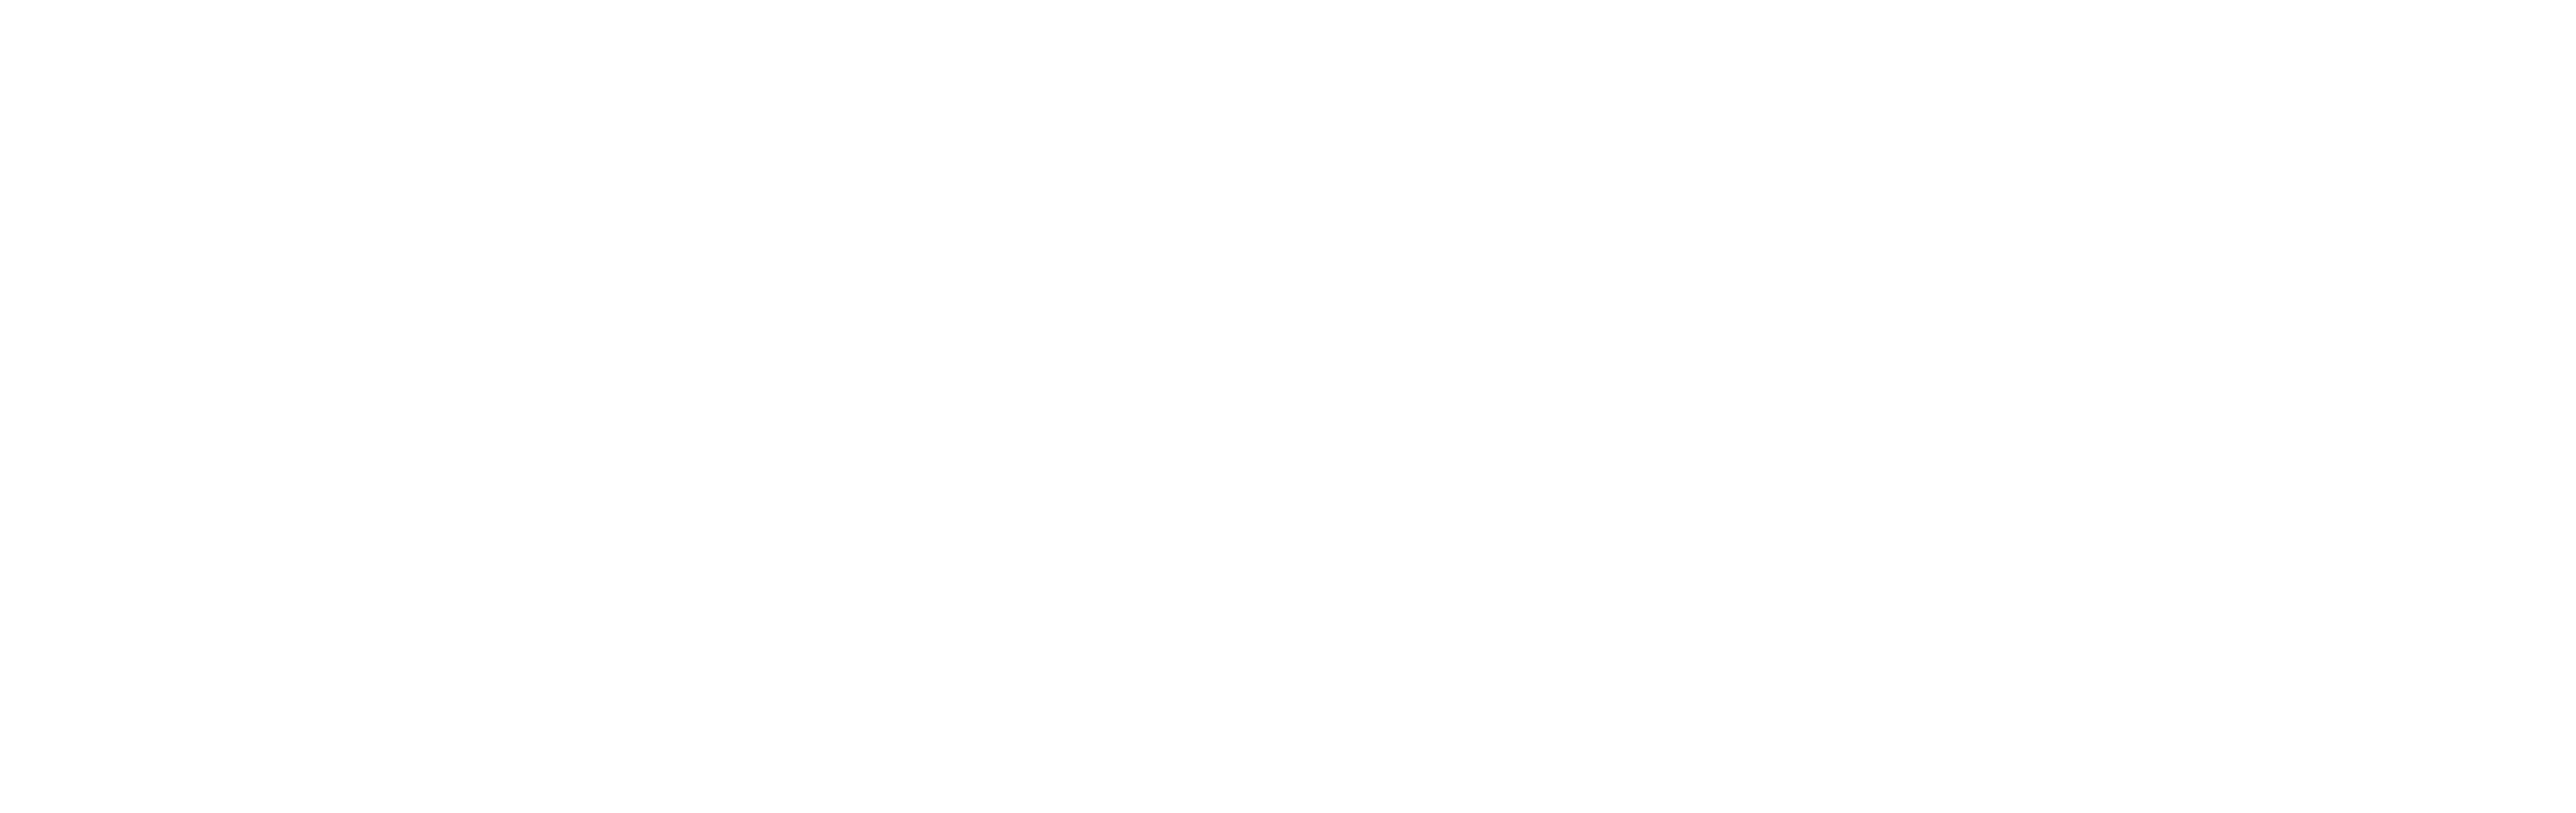

<IPython.core.display.Javascript object>


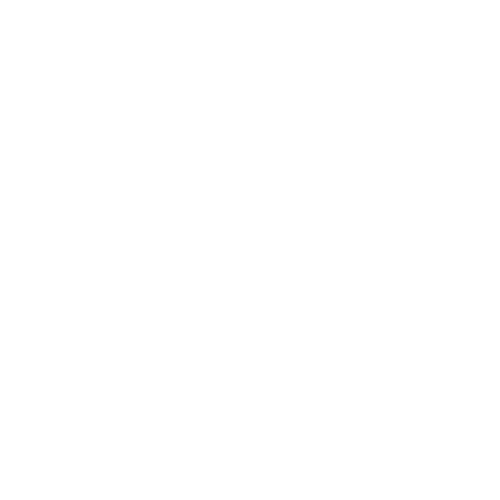

<IPython.core.display.Javascript object>


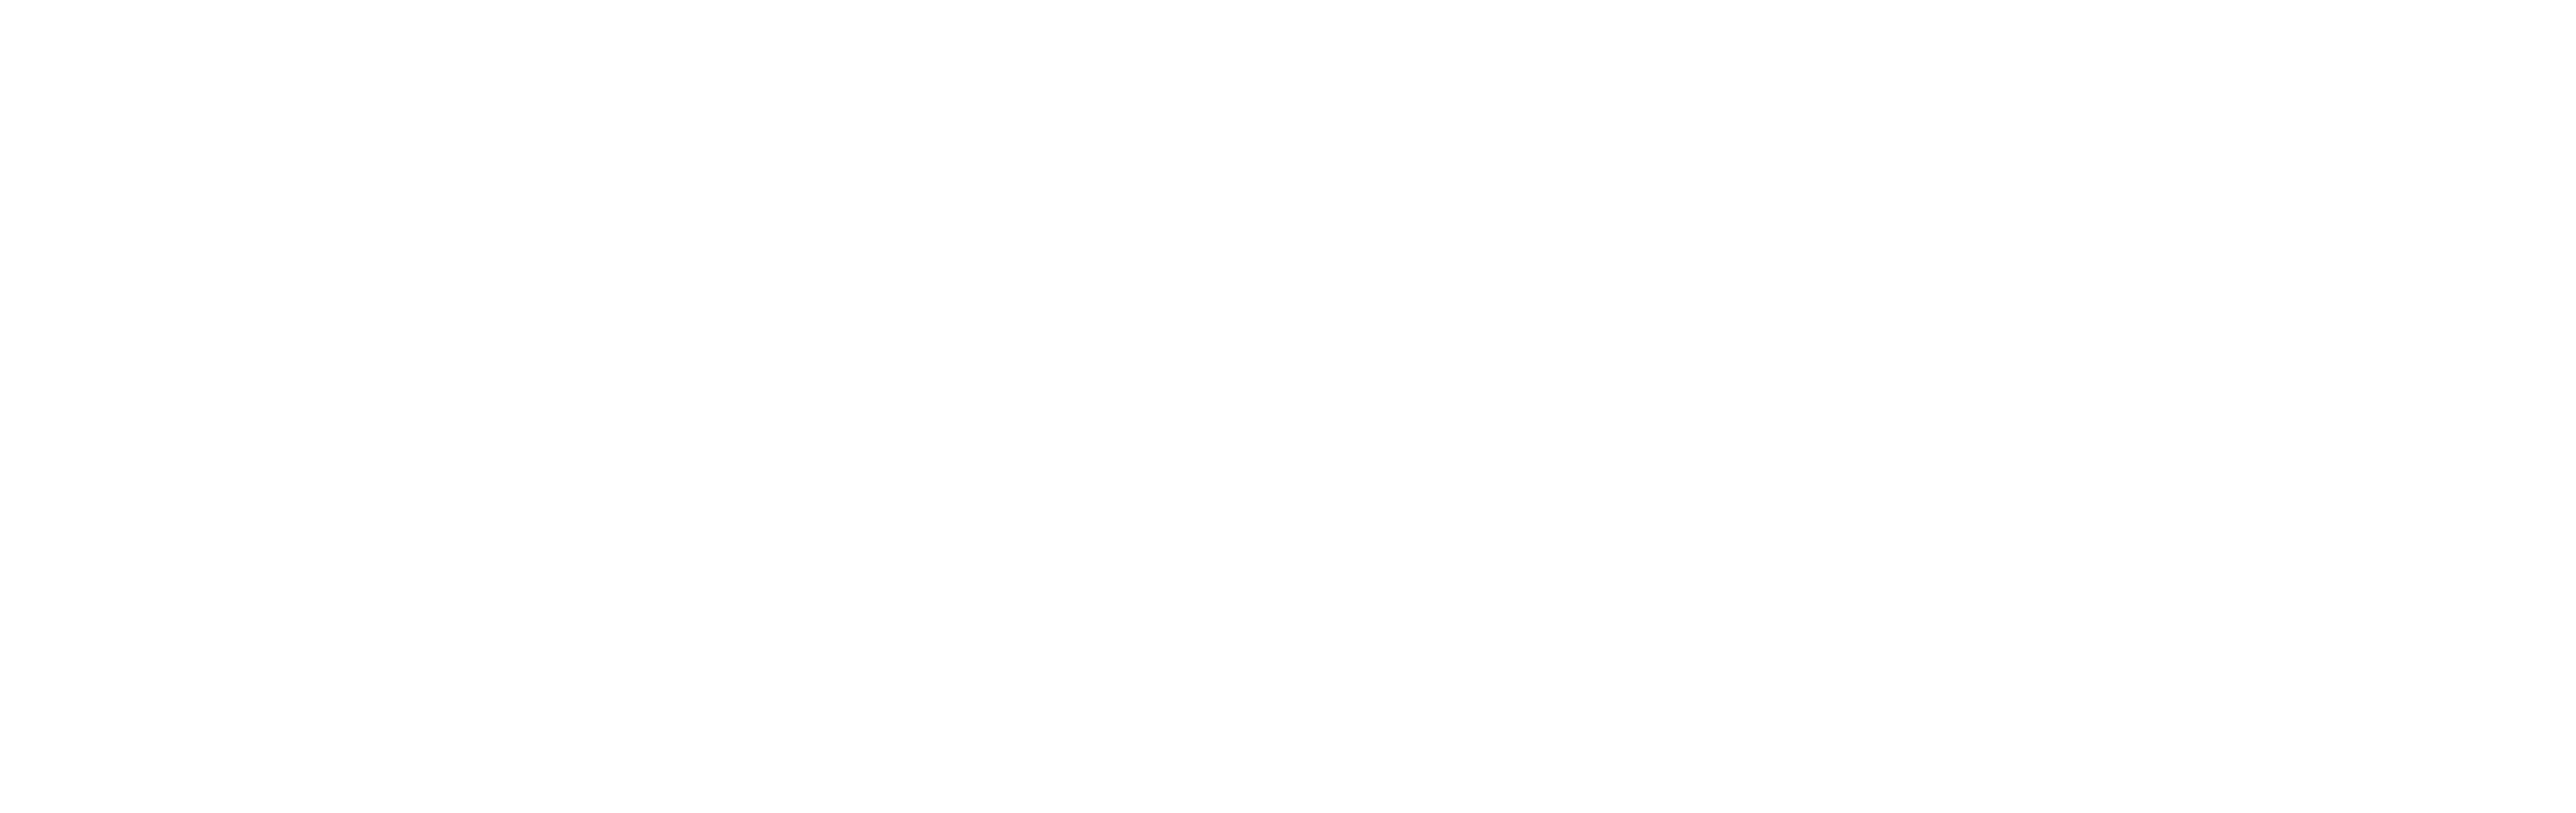

<IPython.core.display.Javascript object>


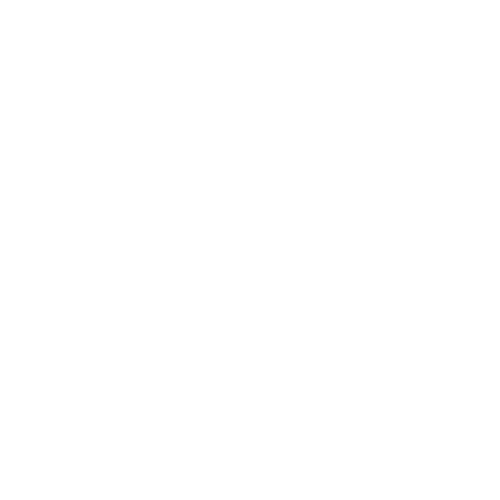

<IPython.core.display.Javascript object>


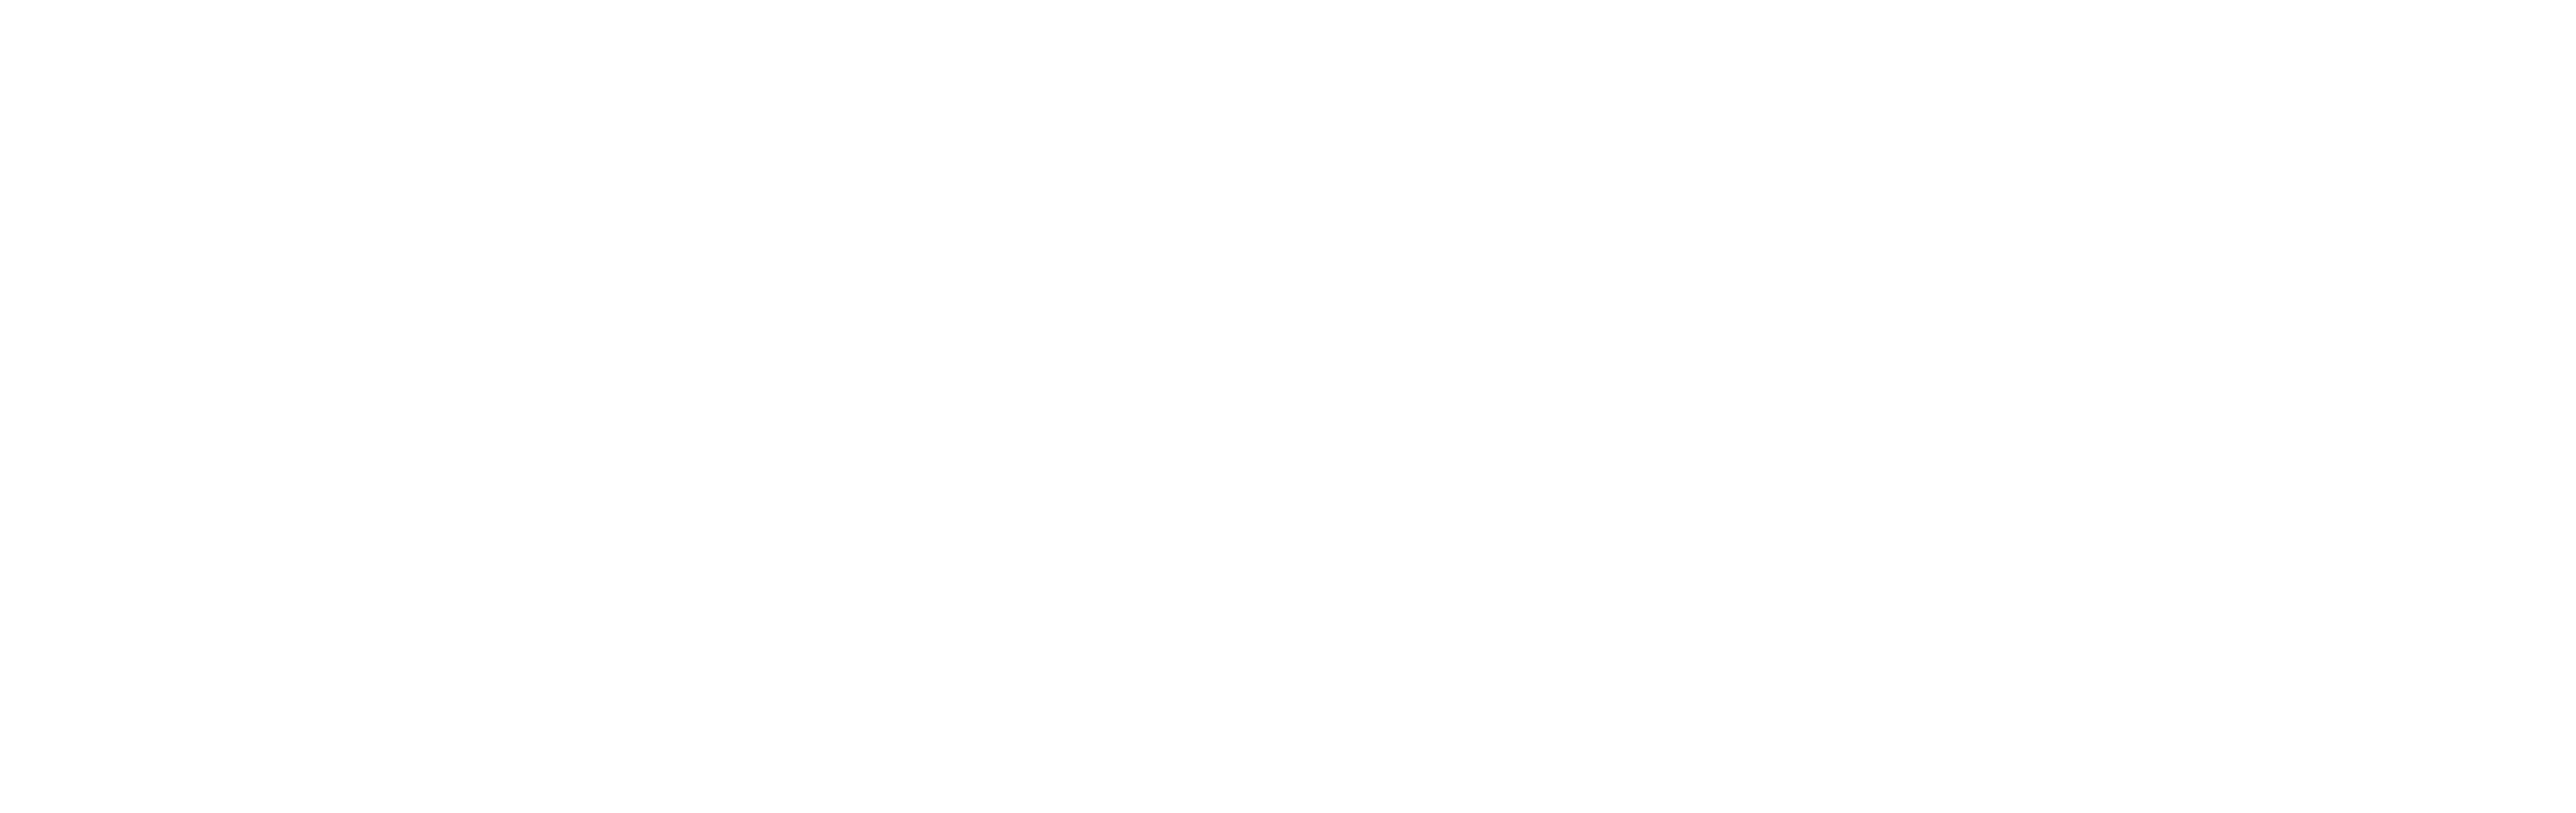

<IPython.core.display.Javascript object>


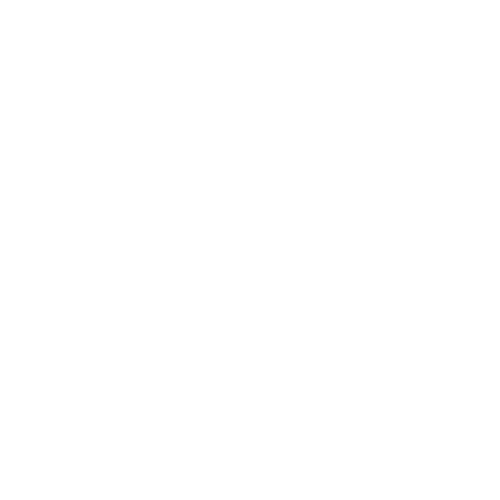

<IPython.core.display.Javascript object>


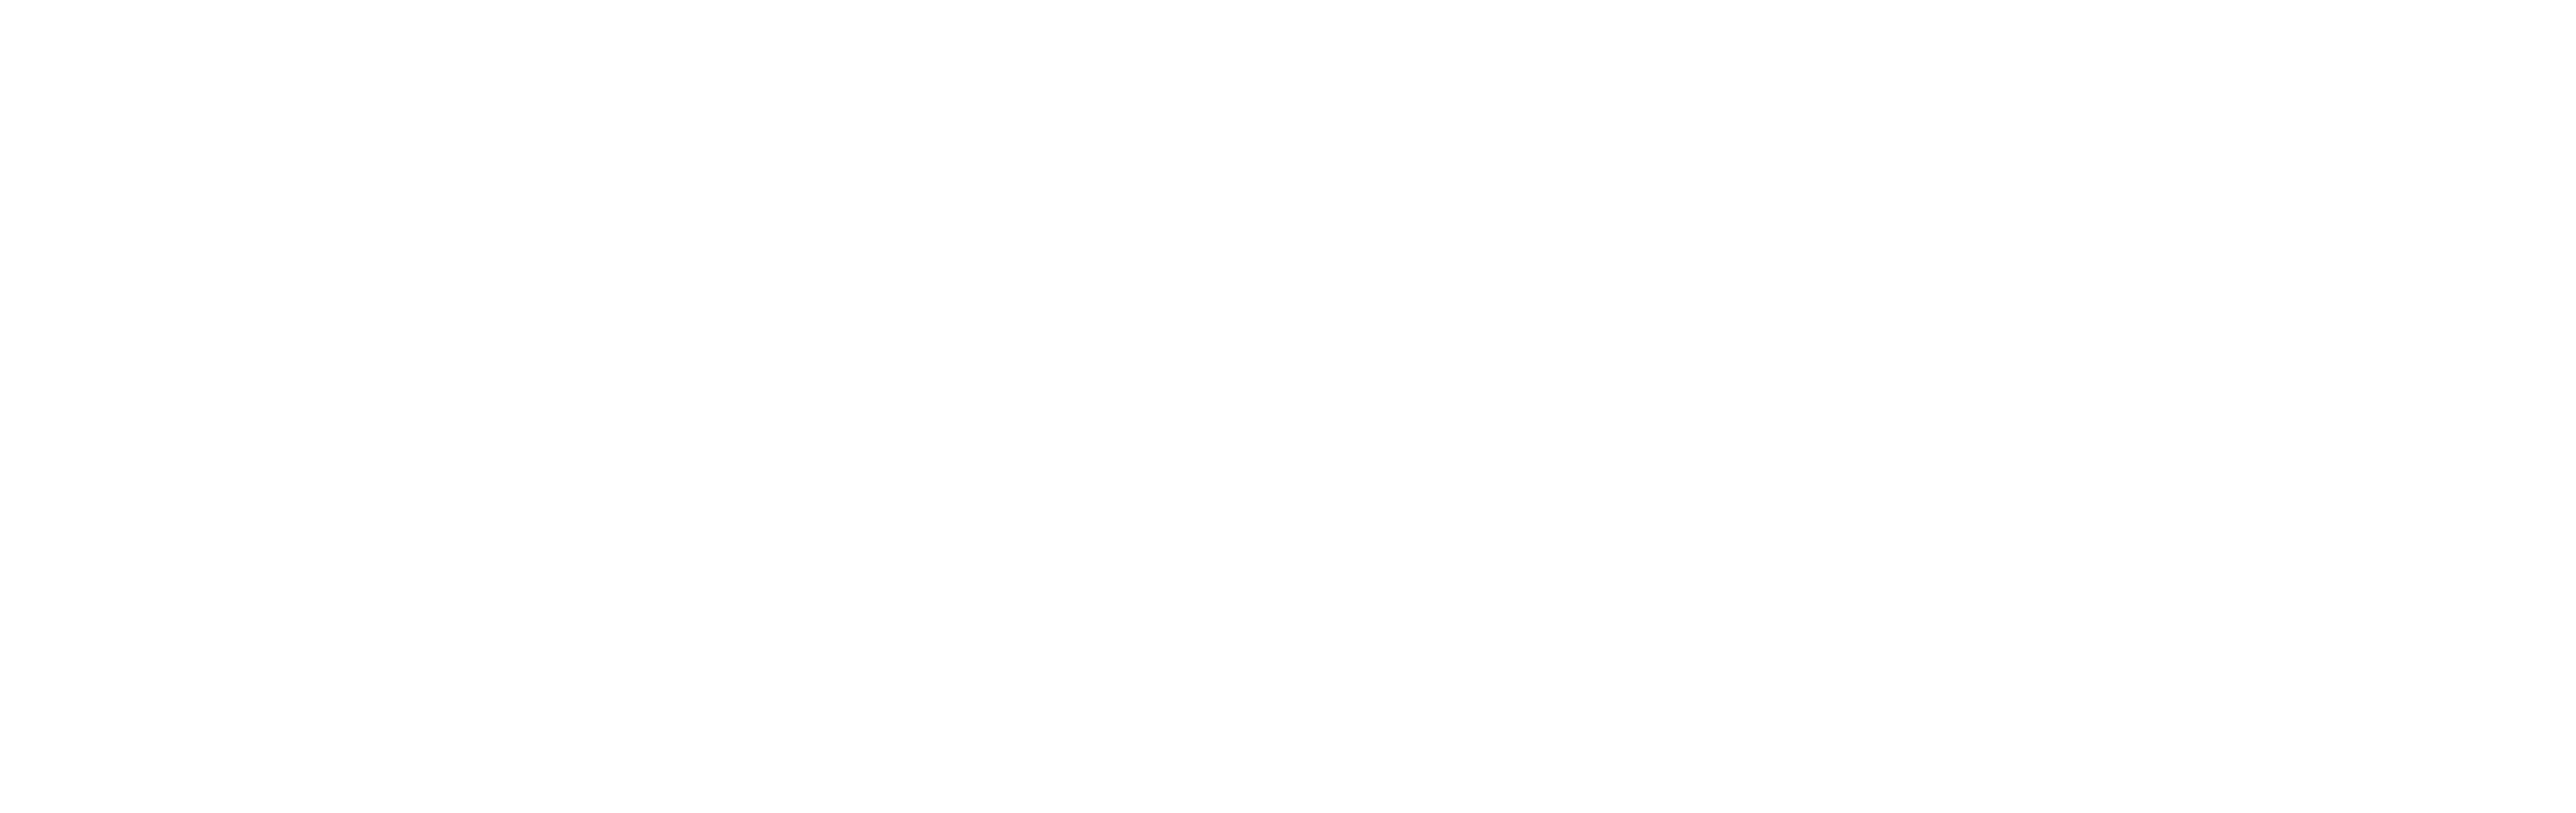

<IPython.core.display.Javascript object>


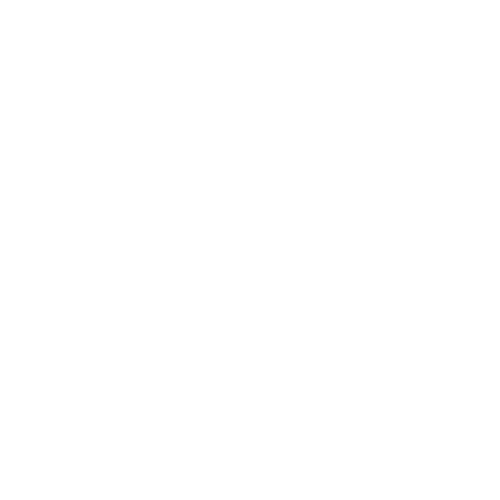

<IPython.core.display.Javascript object>


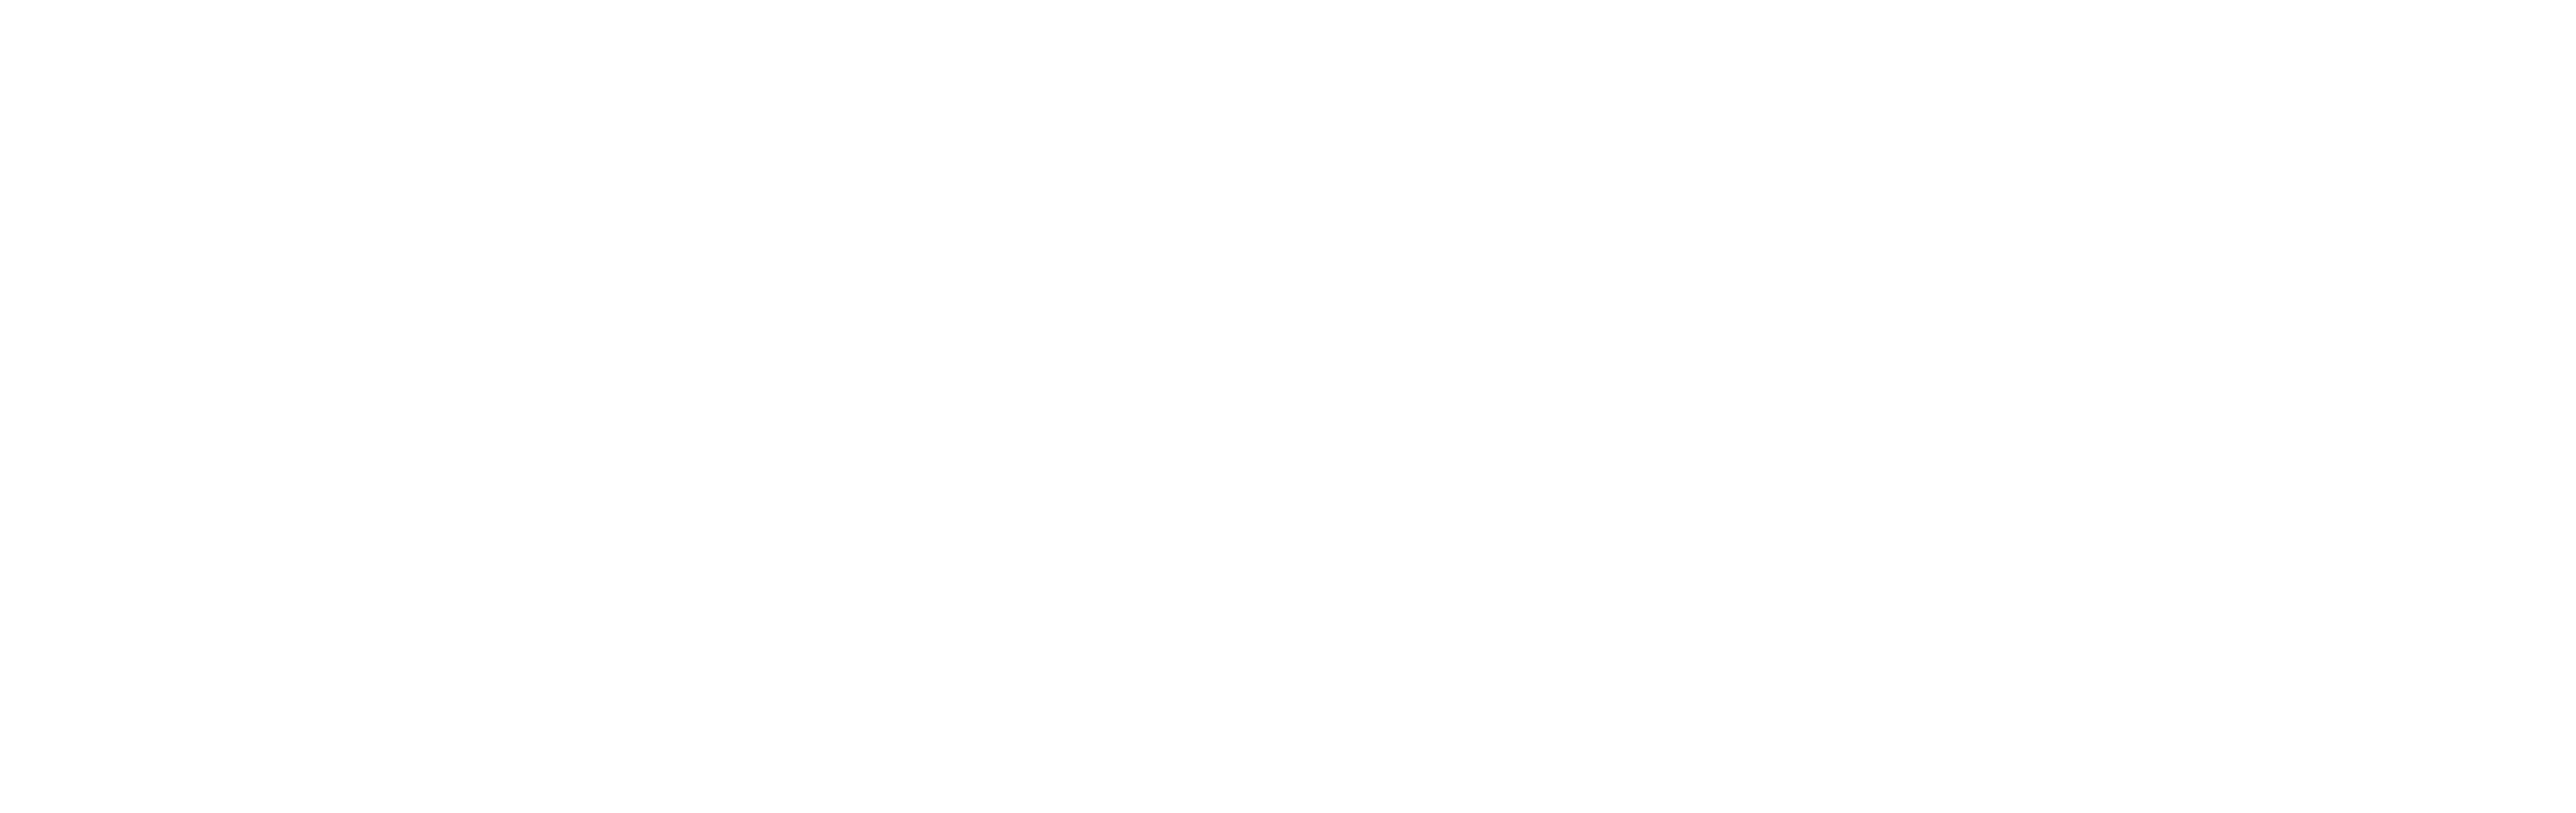

<IPython.core.display.Javascript object>


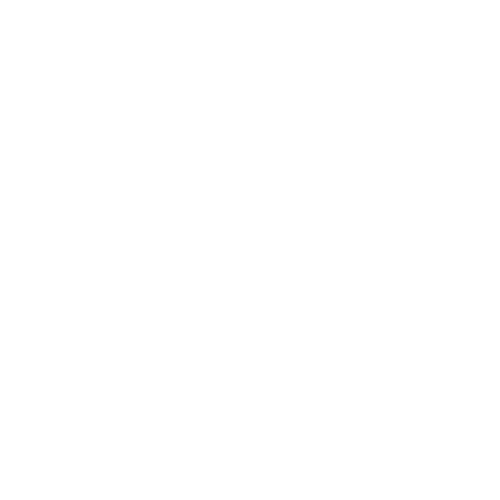

<IPython.core.display.Javascript object>


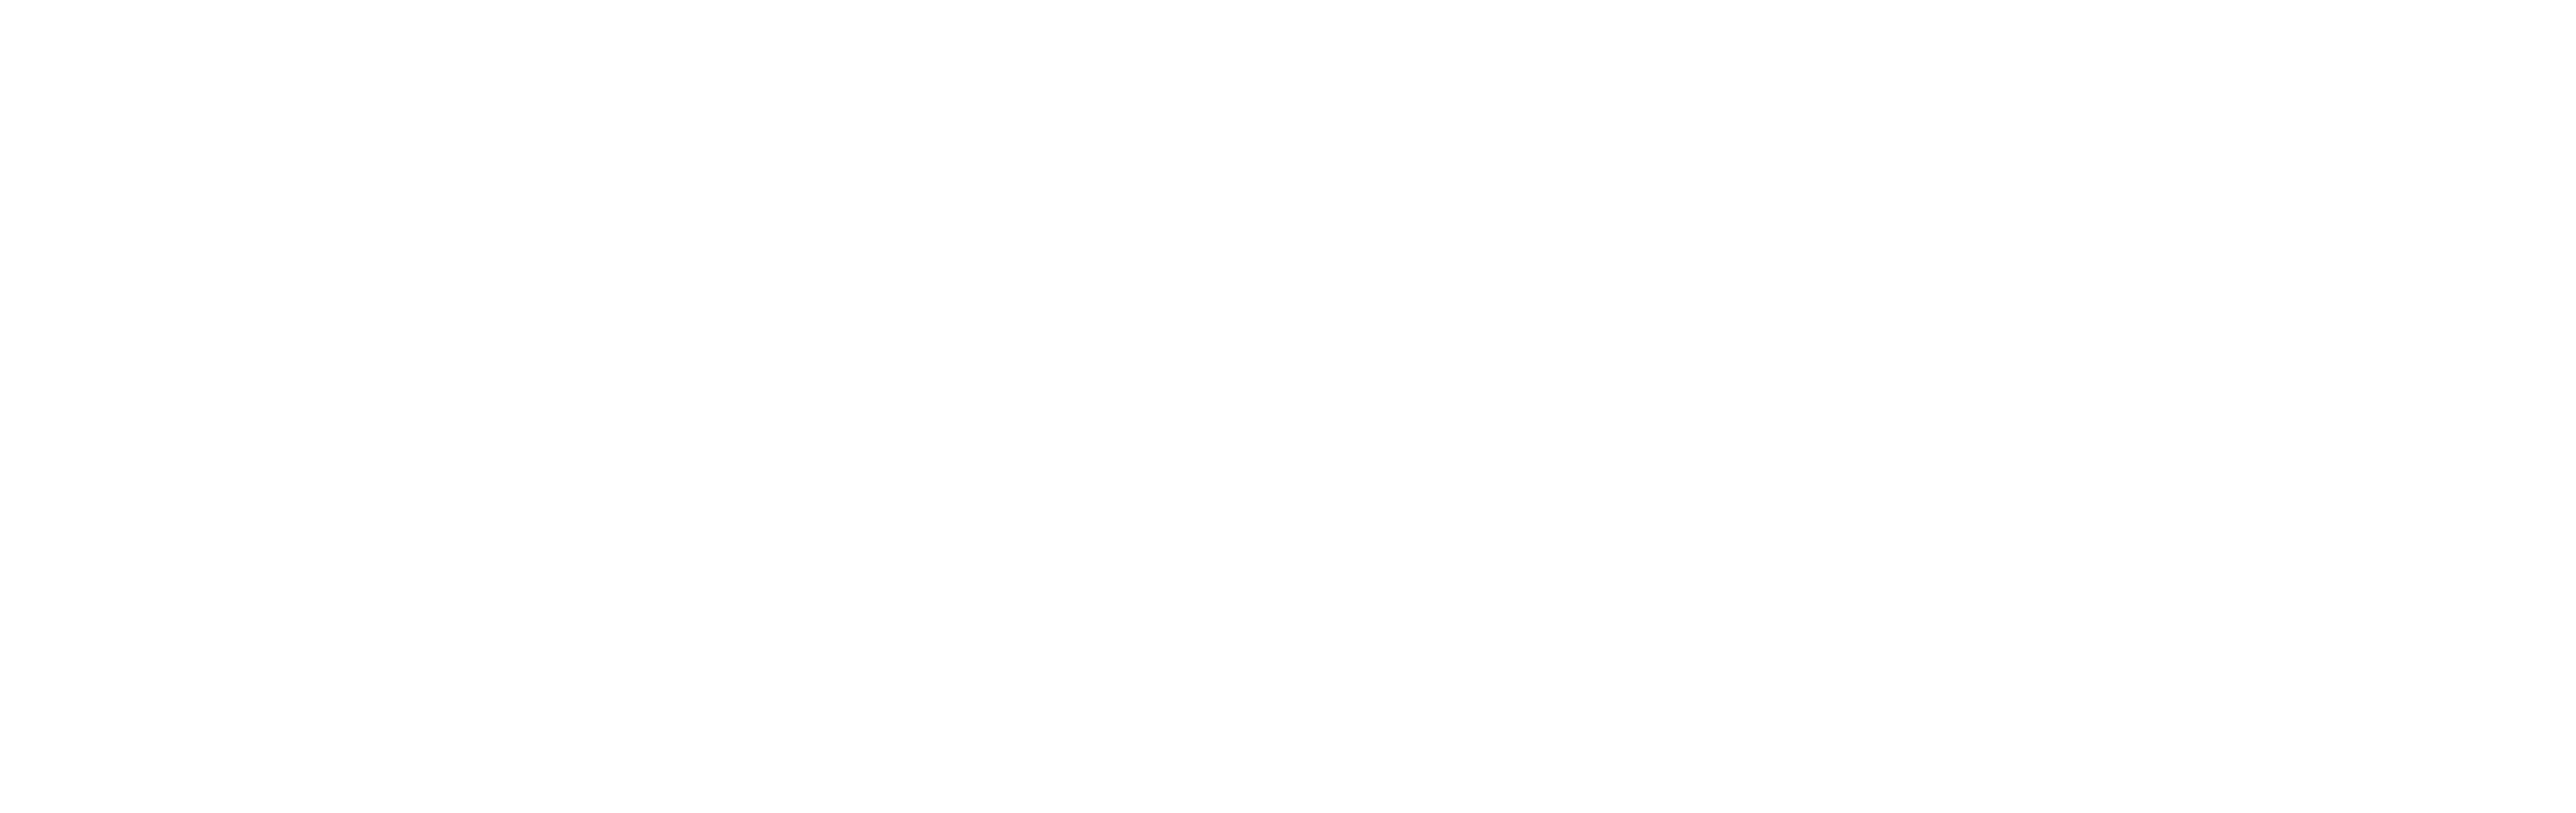

<IPython.core.display.Javascript object>


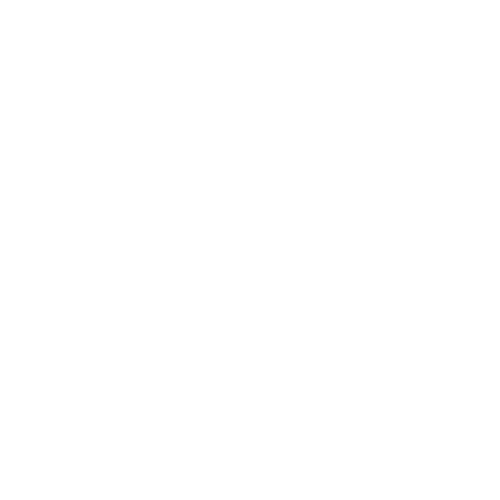

<IPython.core.display.Javascript object>


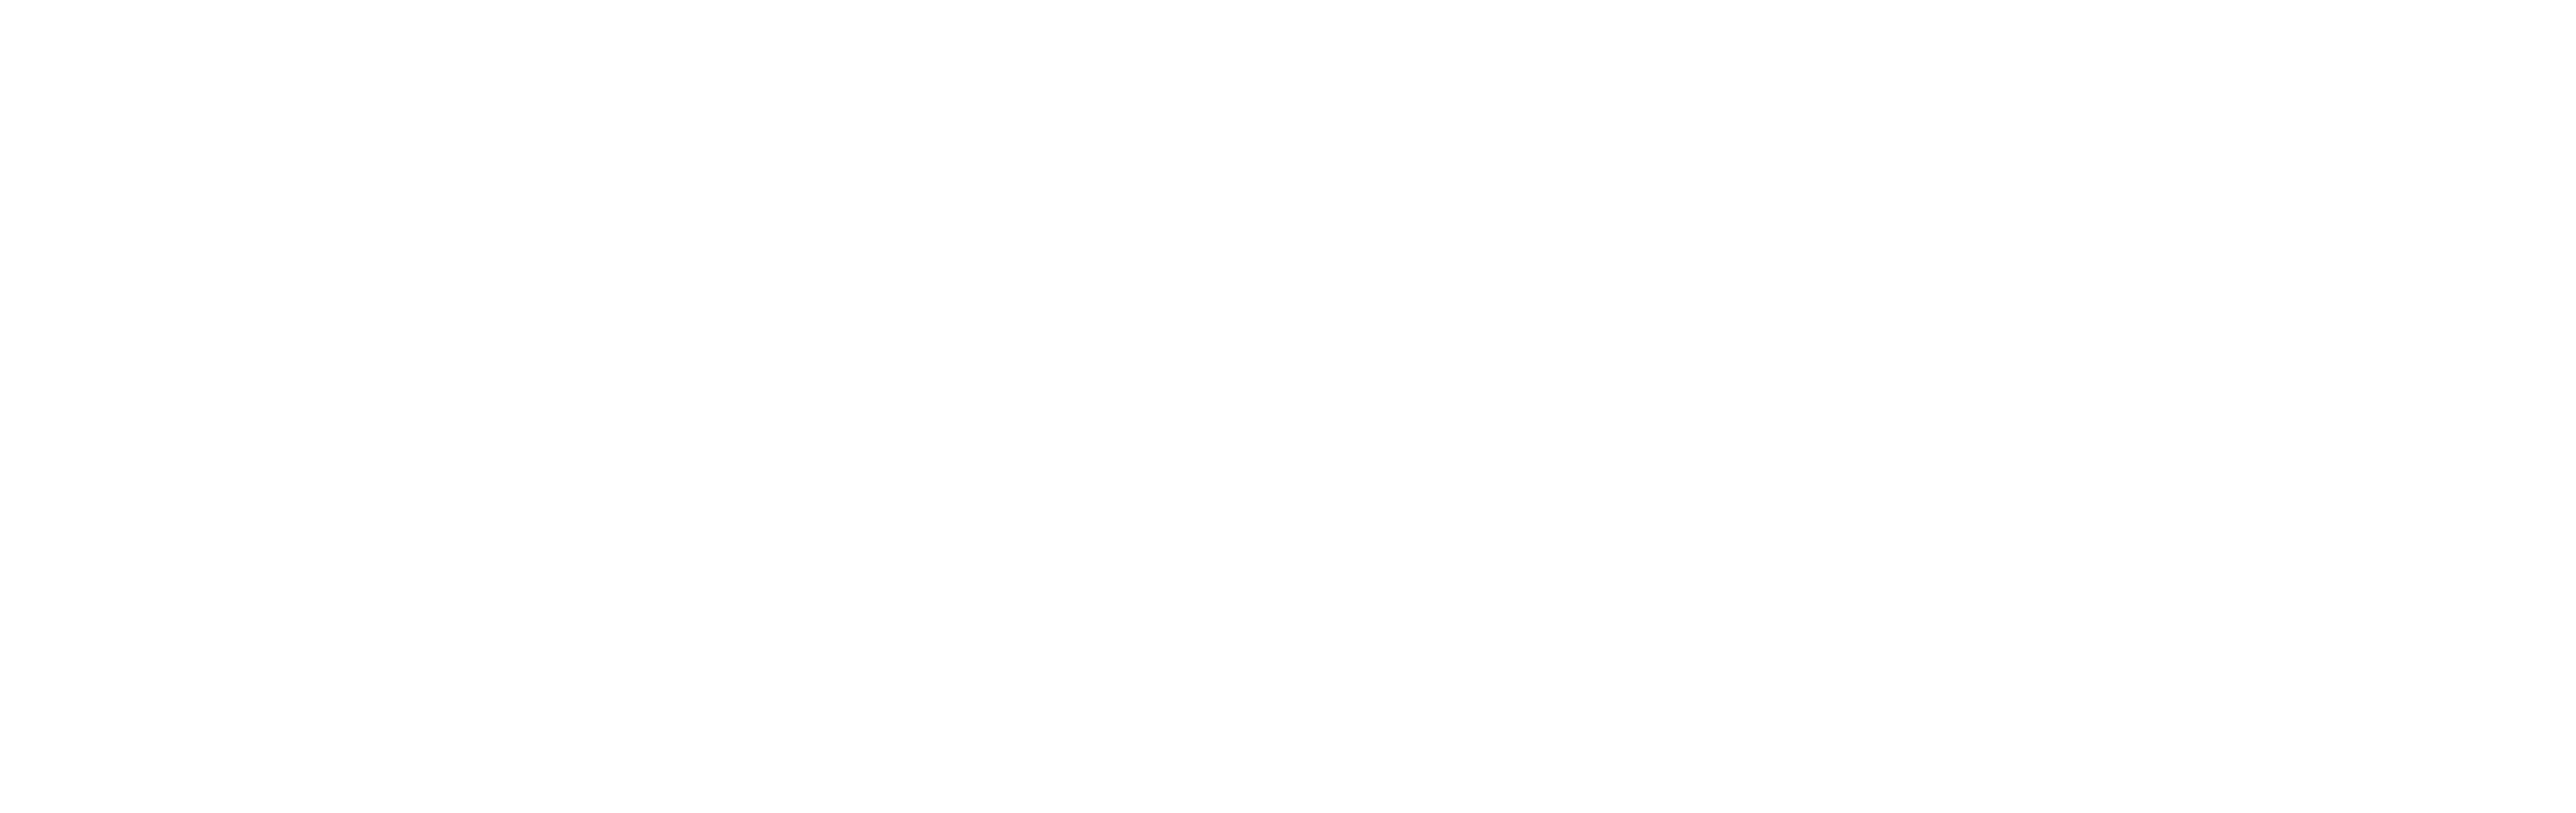

<IPython.core.display.Javascript object>


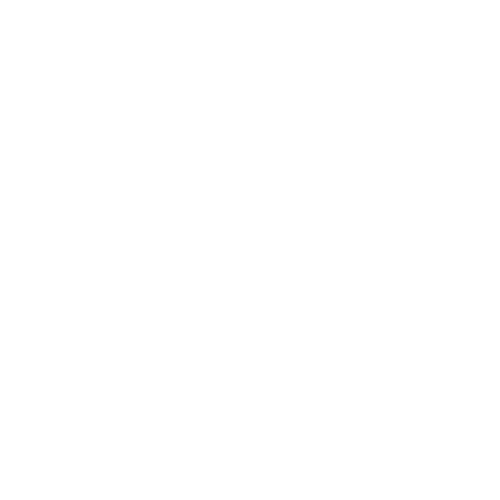

<IPython.core.display.Javascript object>


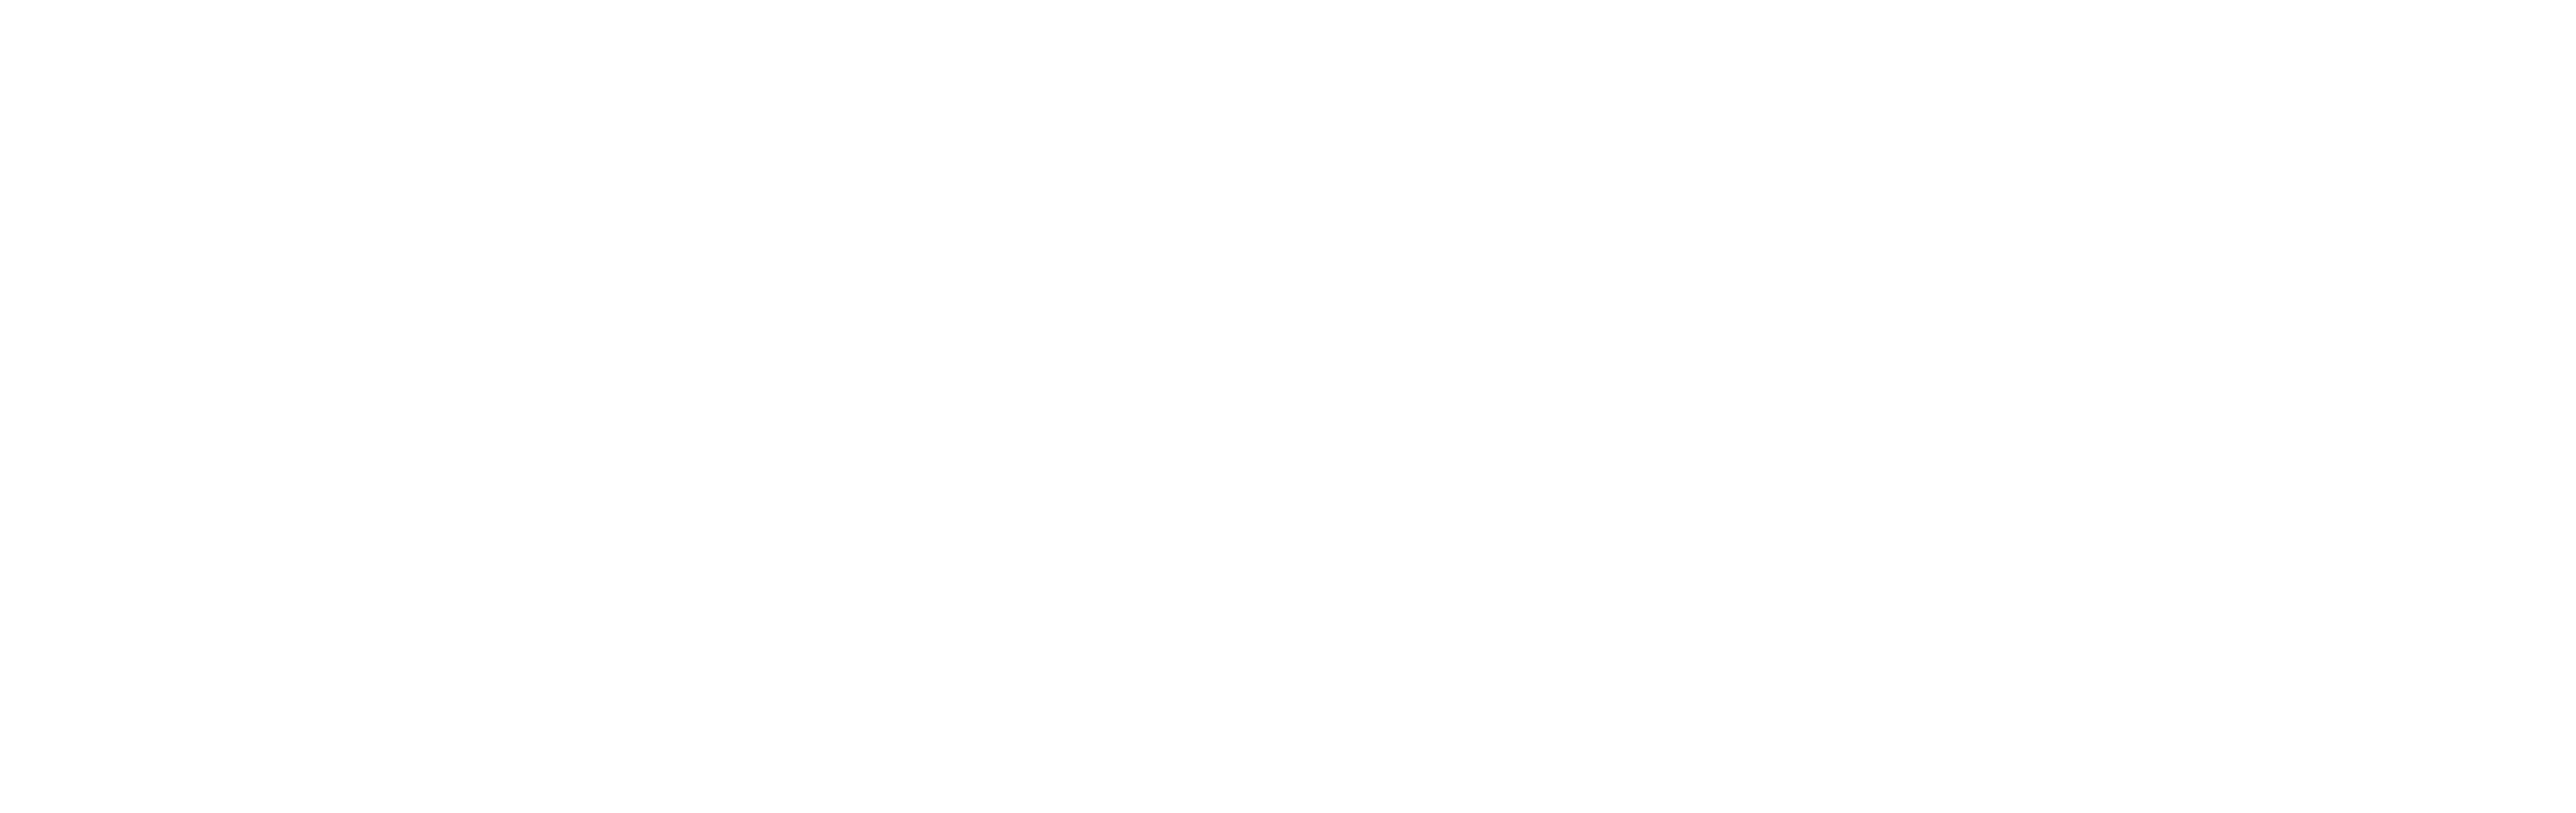

<IPython.core.display.Javascript object>


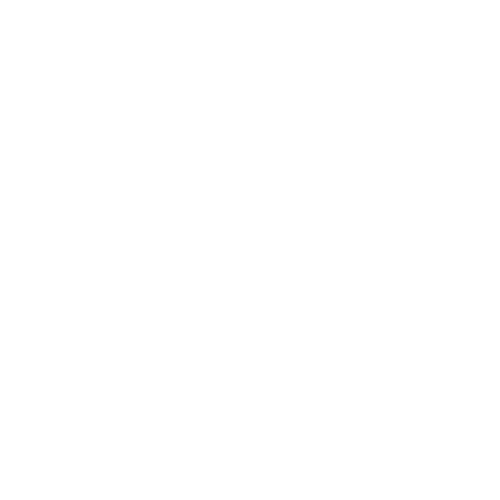

<IPython.core.display.Javascript object>


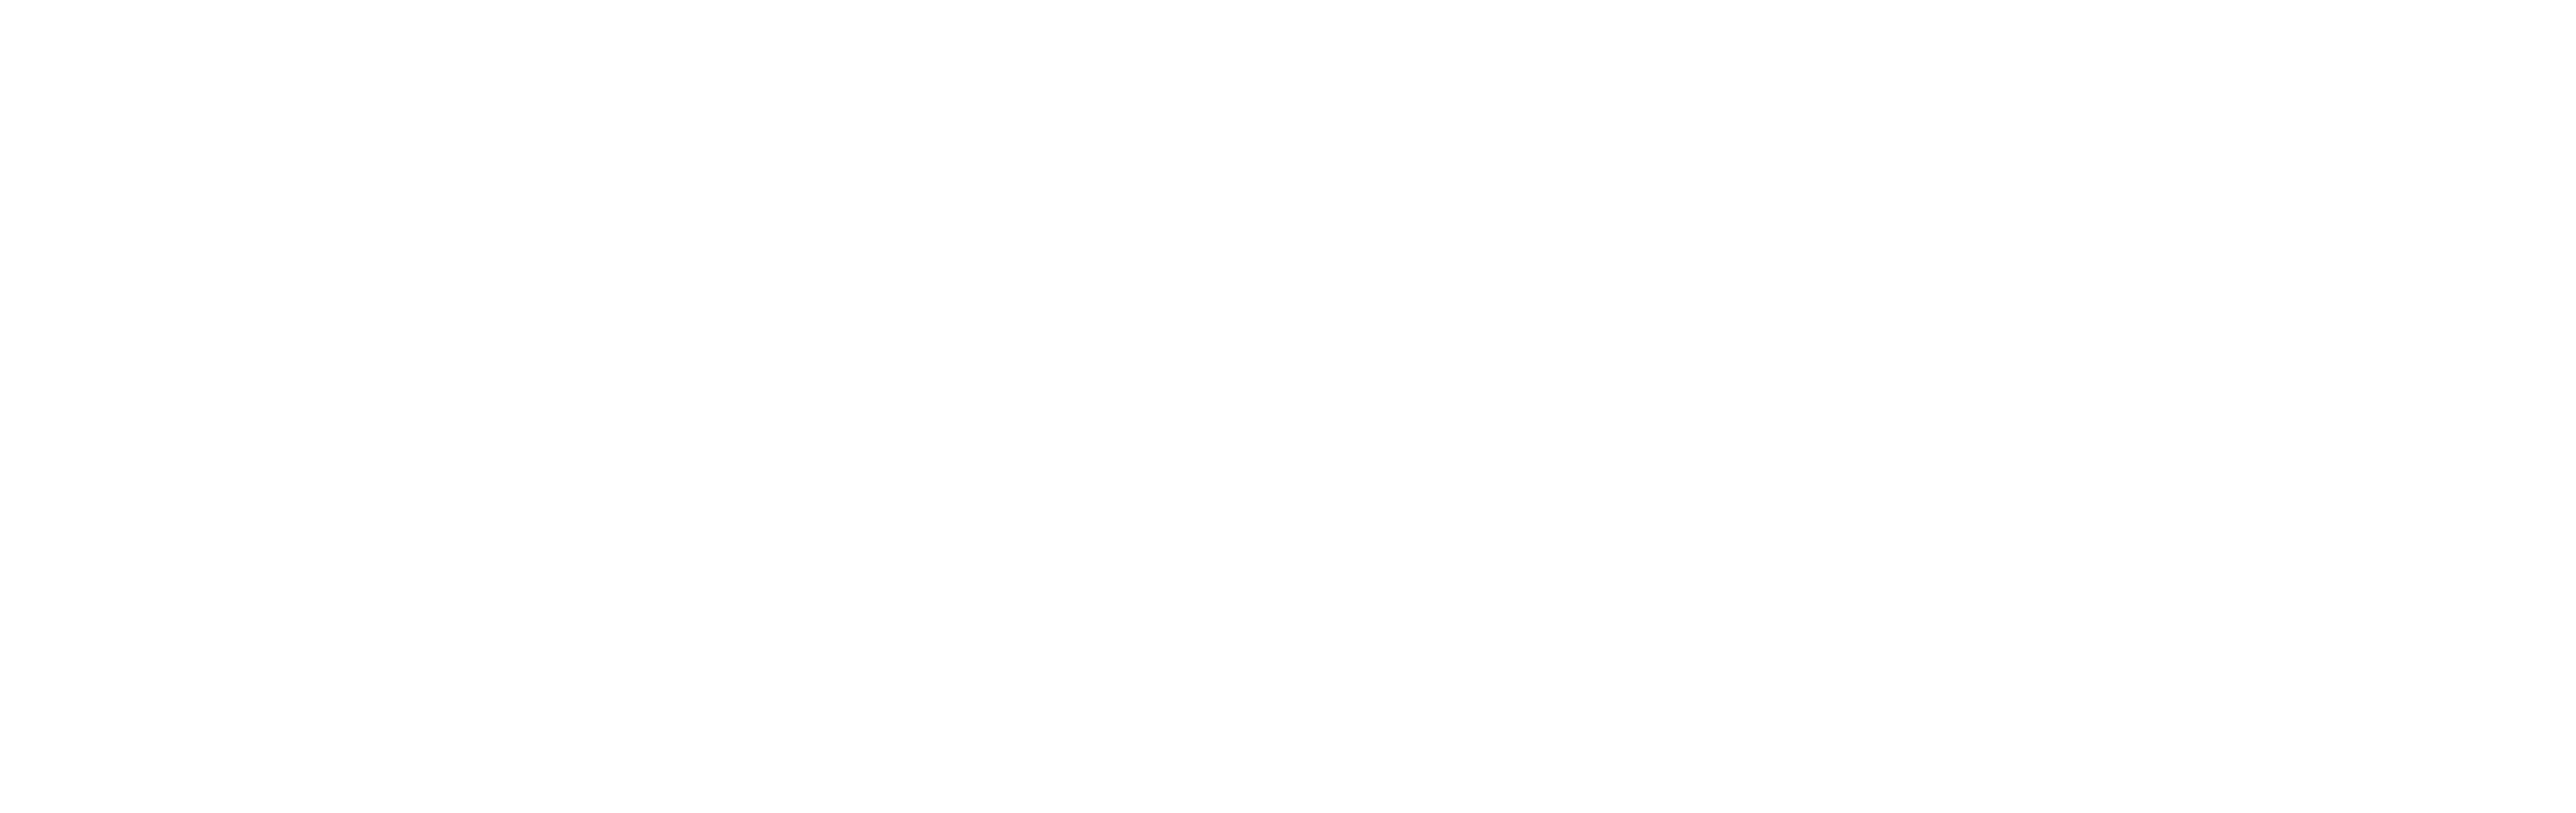

<IPython.core.display.Javascript object>


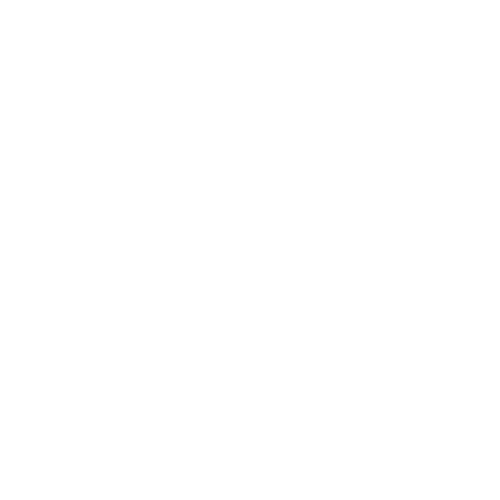

<IPython.core.display.Javascript object>


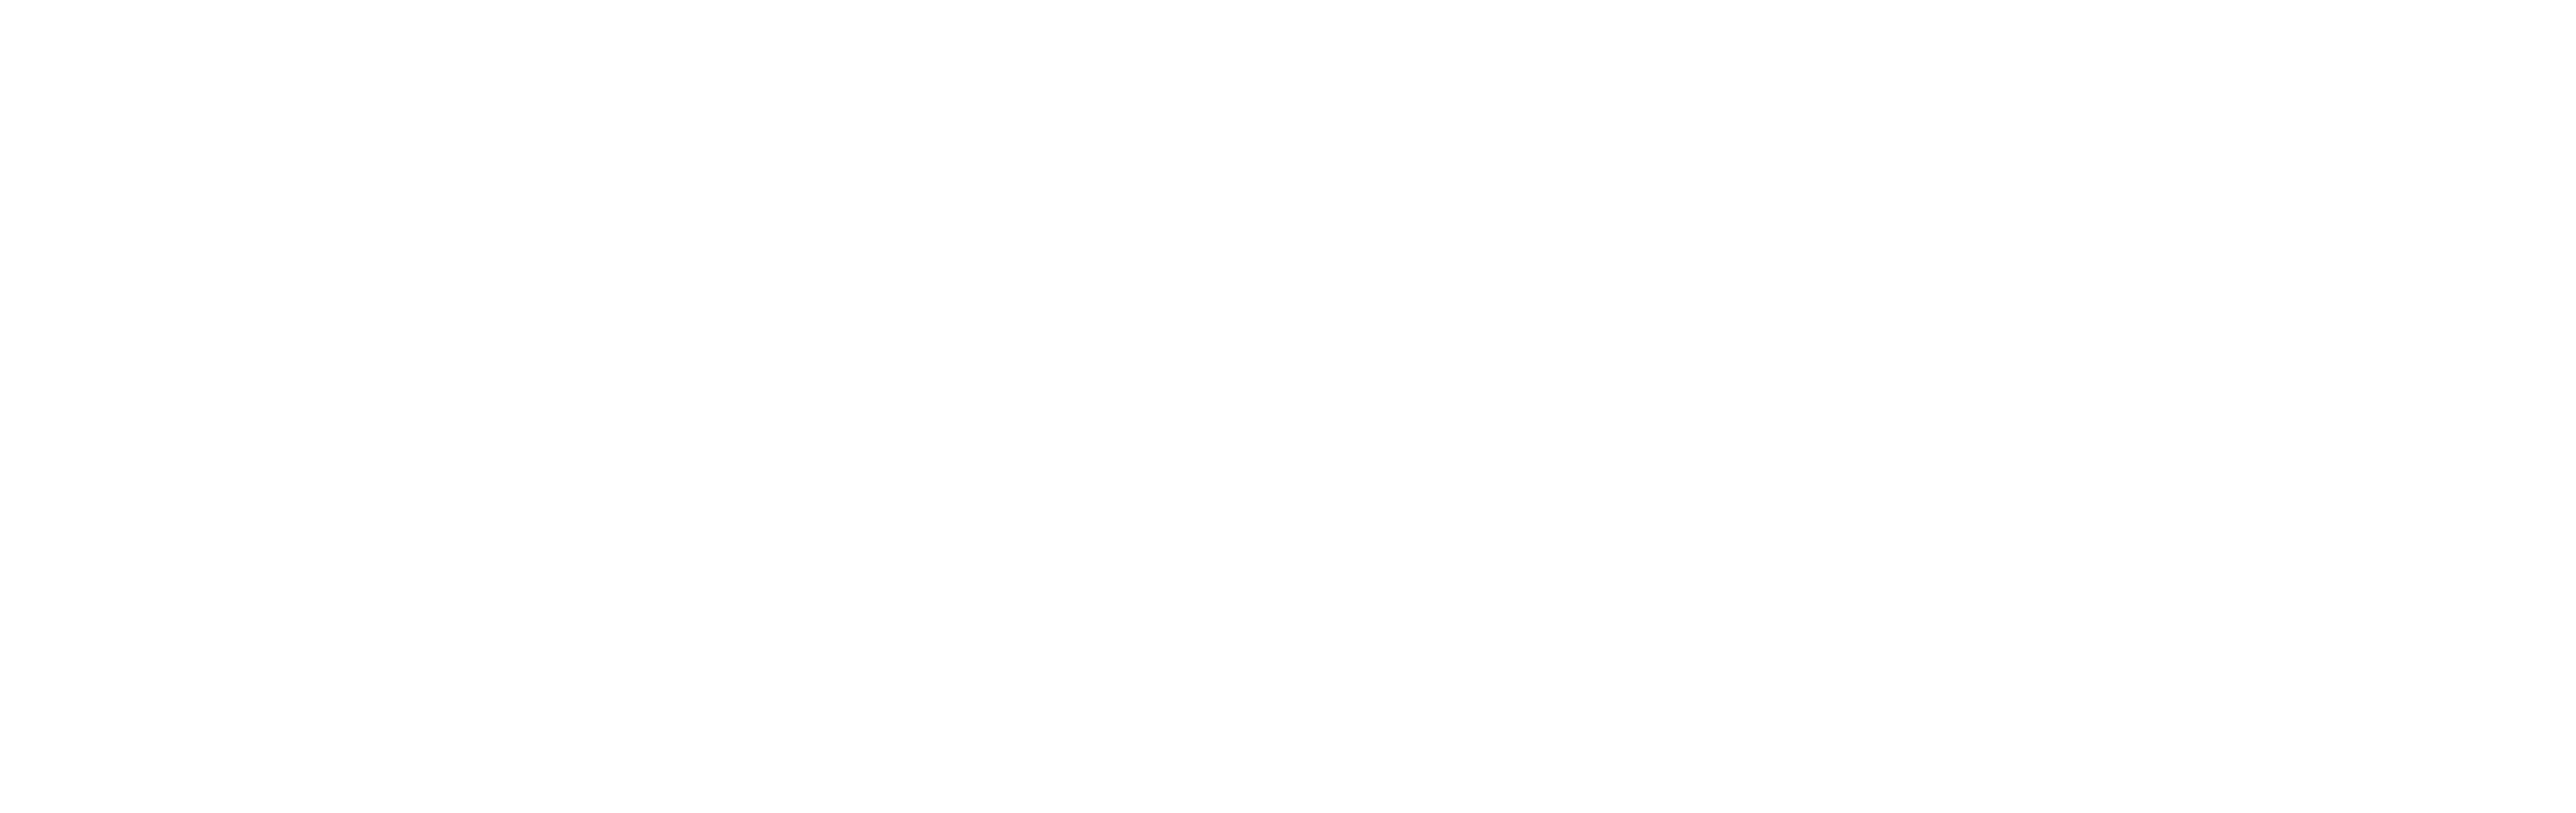

<IPython.core.display.Javascript object>


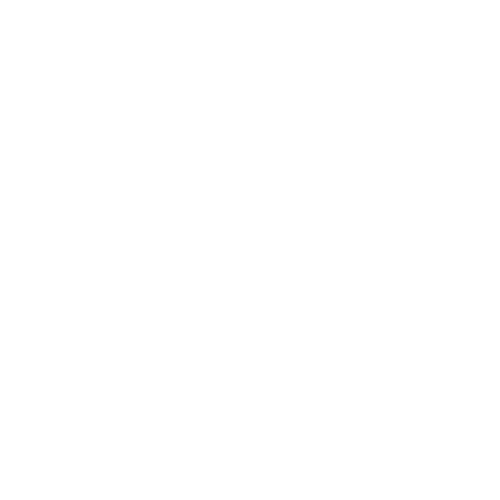

<IPython.core.display.Javascript object>


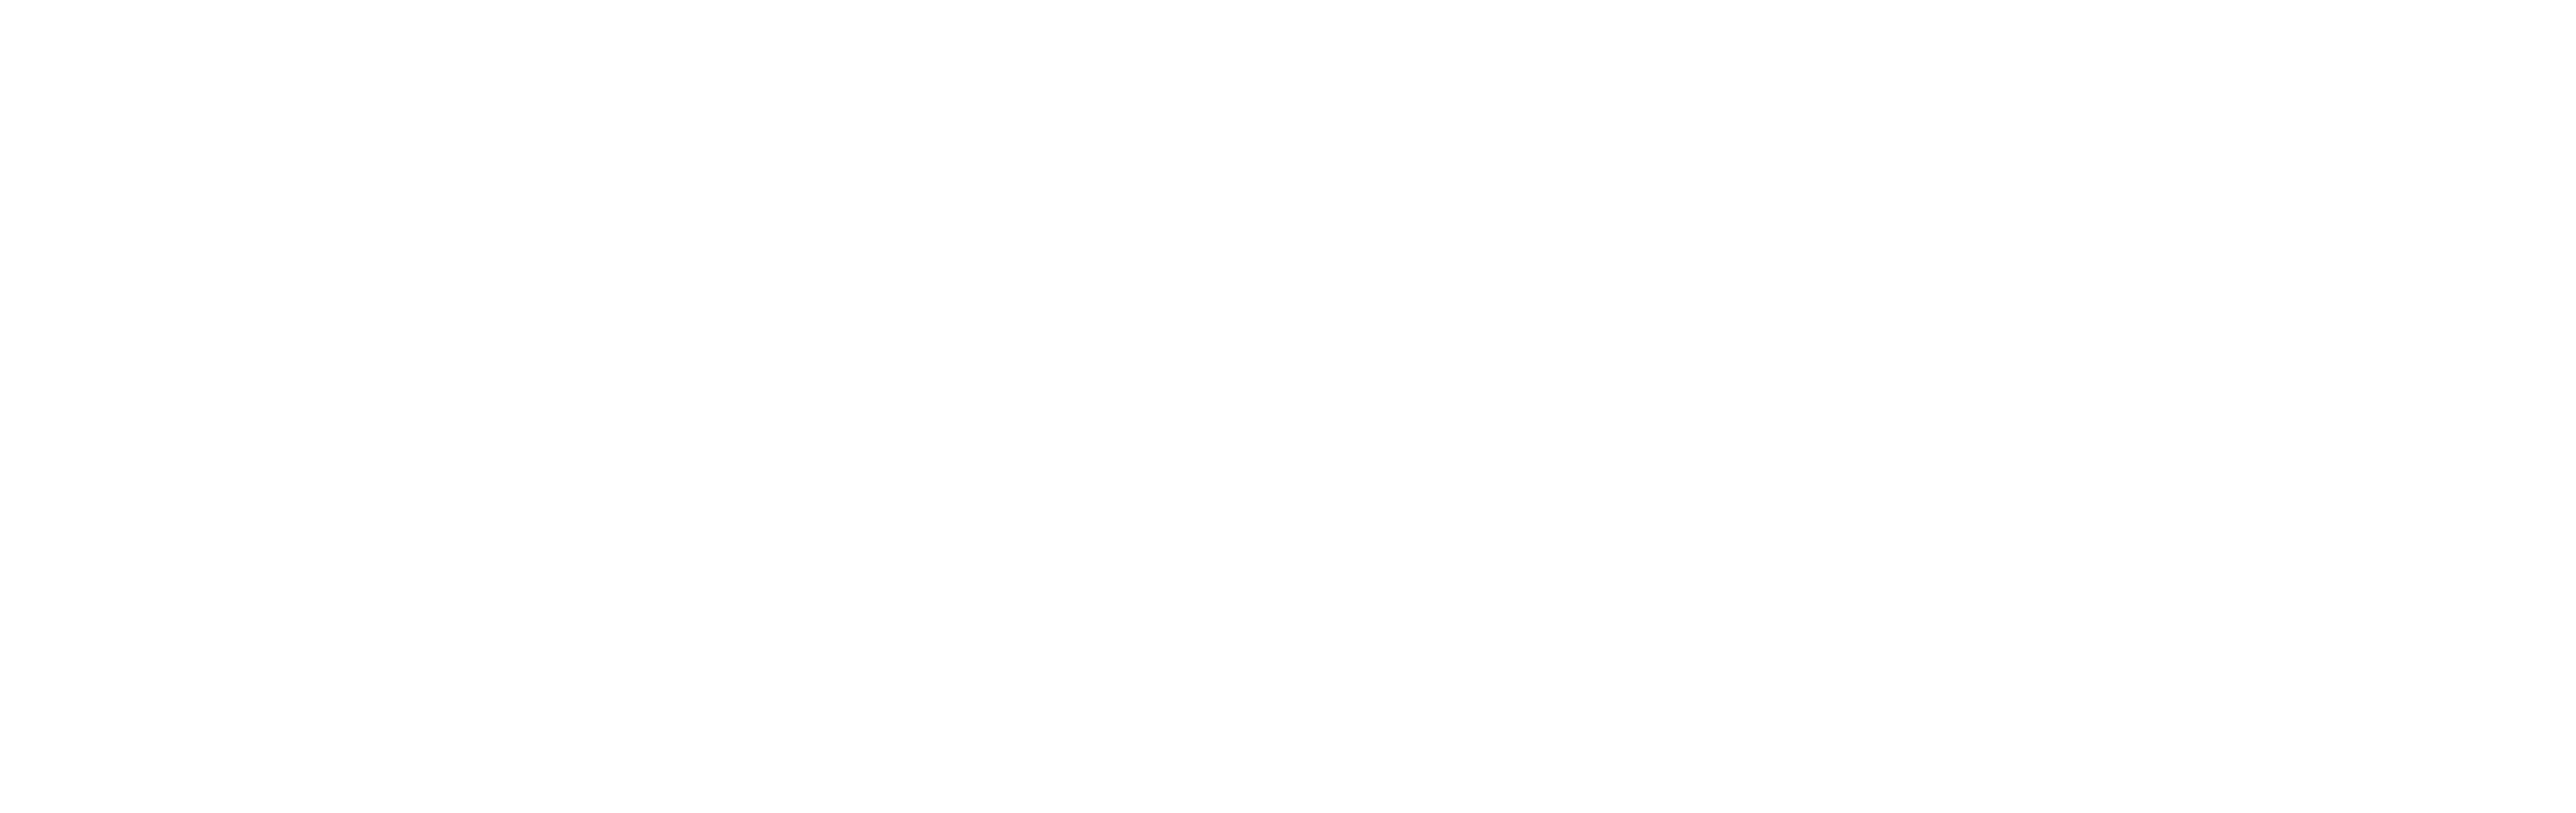

<IPython.core.display.Javascript object>


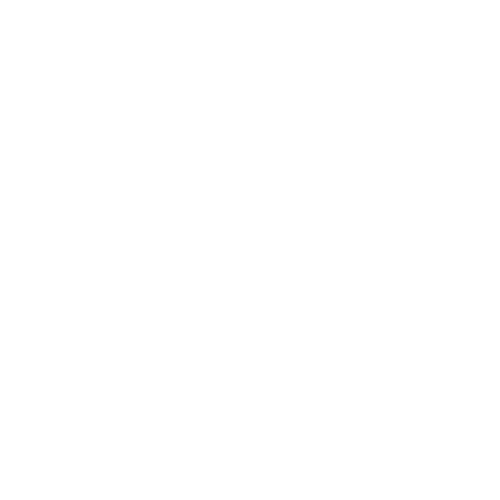

<IPython.core.display.Javascript object>


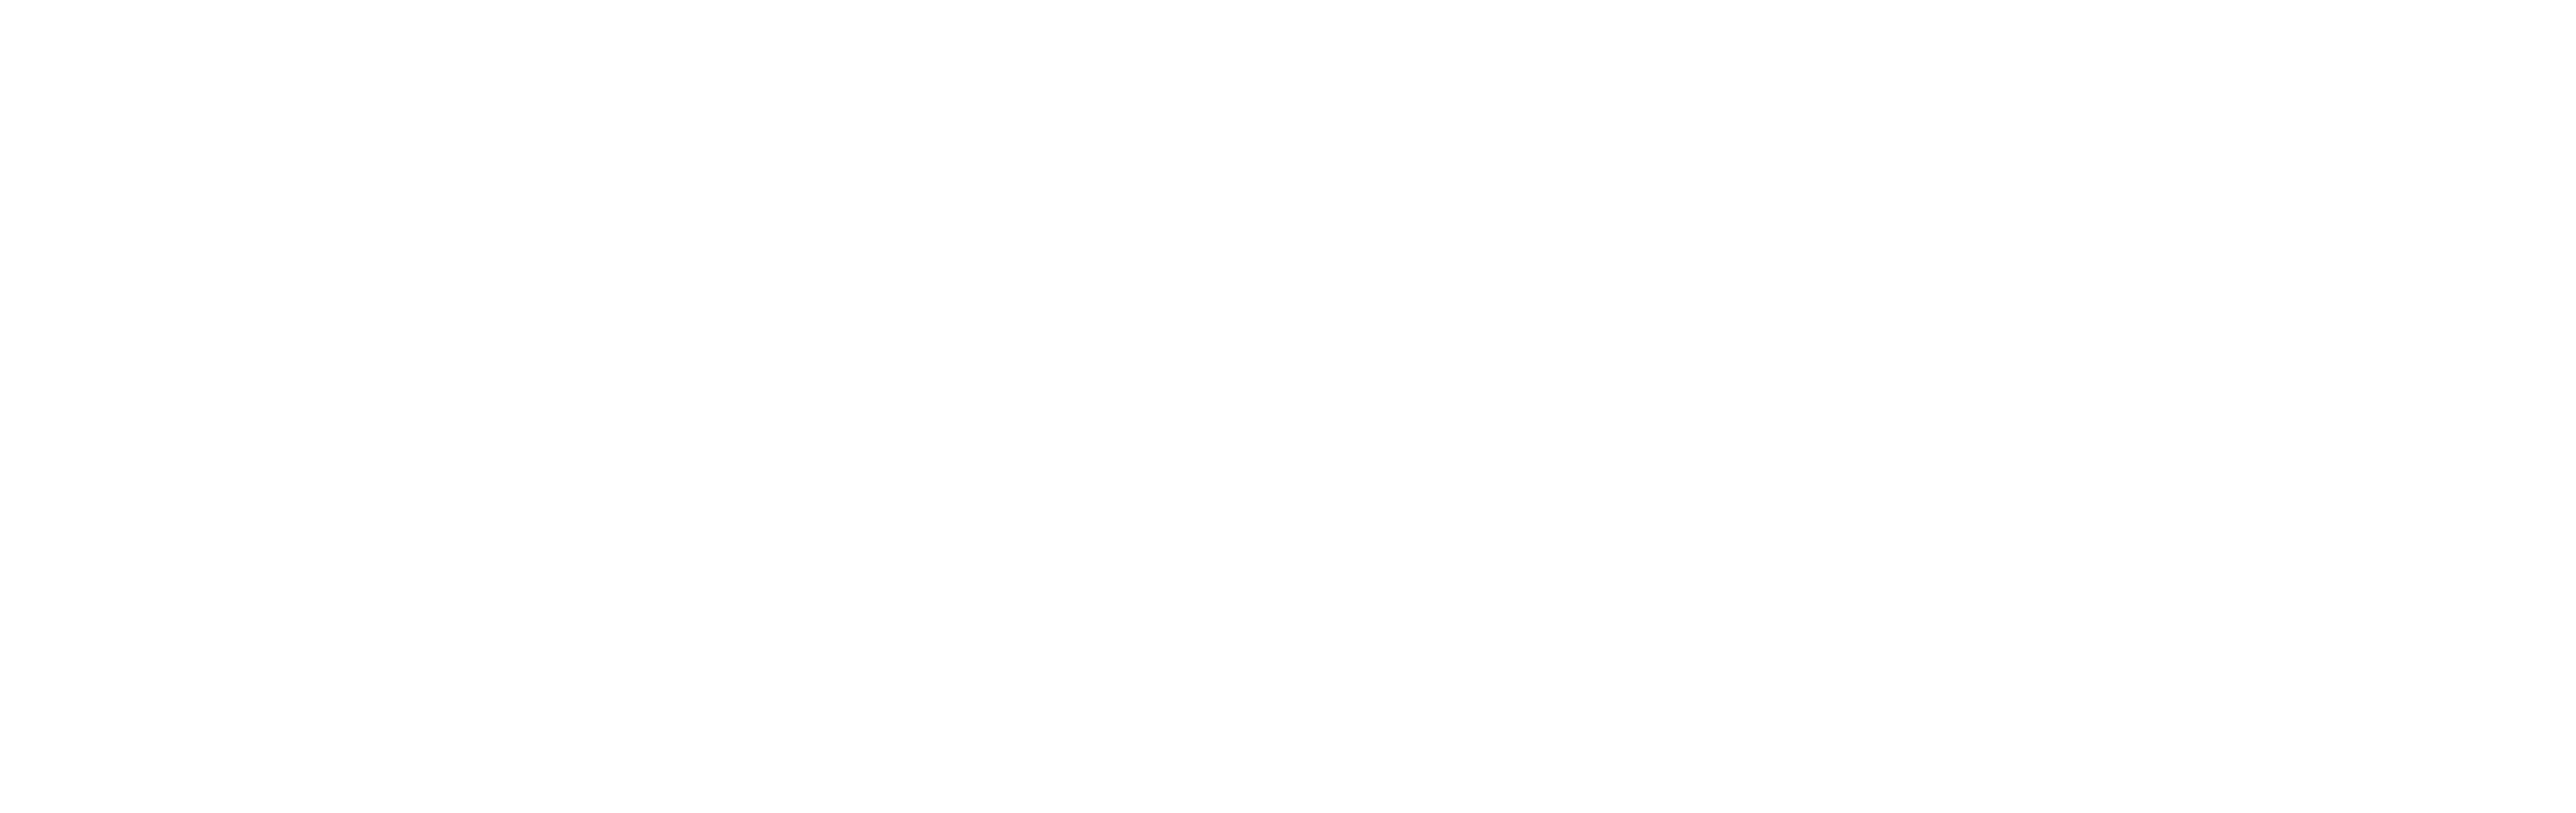

<IPython.core.display.Javascript object>


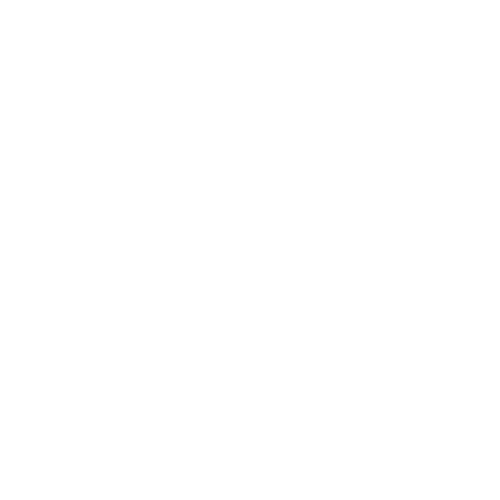

In [63]:
activations = model.get_max_activations(data, "test")
logos = model.visualize_all_kernels(activations, data, output_folder)

To find the motif, we observe the activations for different kernels. We notice that Kernel 8 and kernel 17 seem to have activations that differ in class 0 and class 1. 

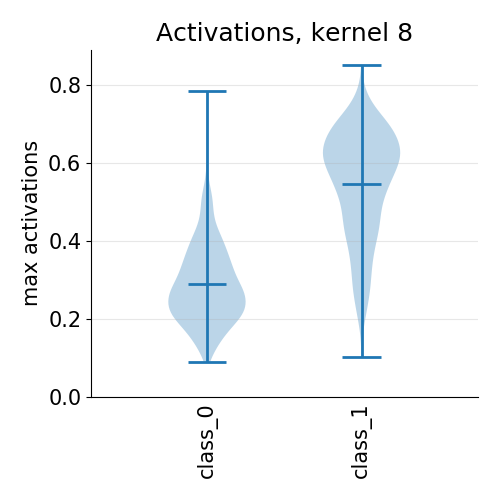

In [53]:
Image(output_folder+"activations_kernel_8.png")

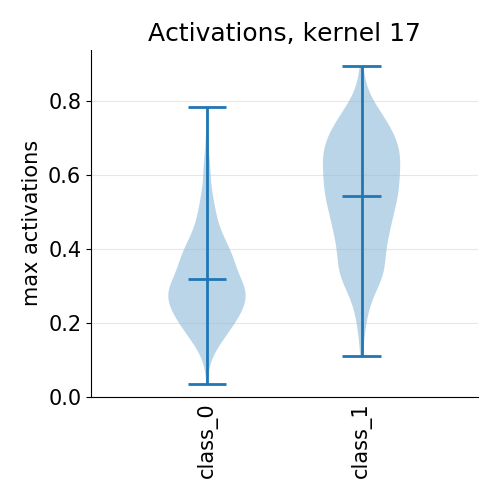

In [56]:
Image(output_folder+"activations_kernel_17.png")

The above graph is a box-whisker plot. For each class, the maximum activation (dot product of kernel and sequence) is plotted for every sequence in the class is plotted. For both the above plots, we realise the kernel activates much more for class 1 than class 0. So we look at the sequence logos of these two plots. 

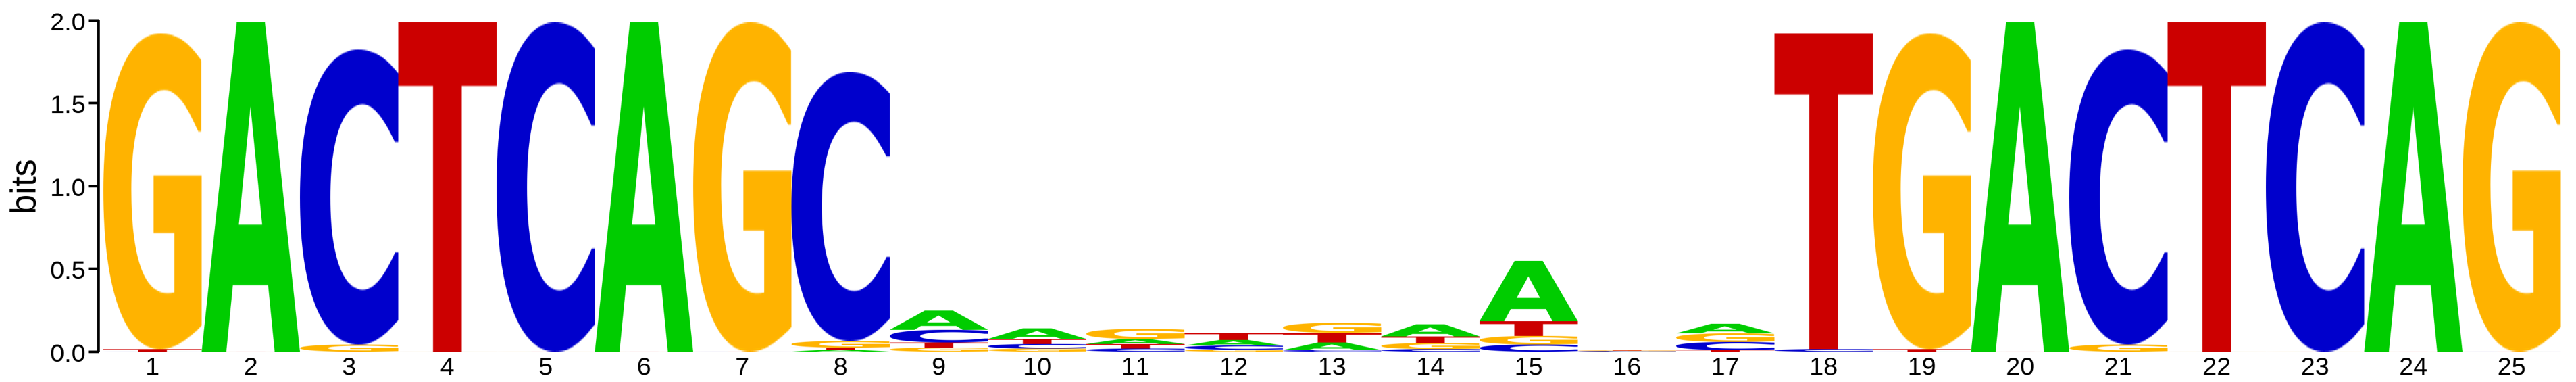

In [58]:
Image(output_folder+"motif_kernel_8.png")

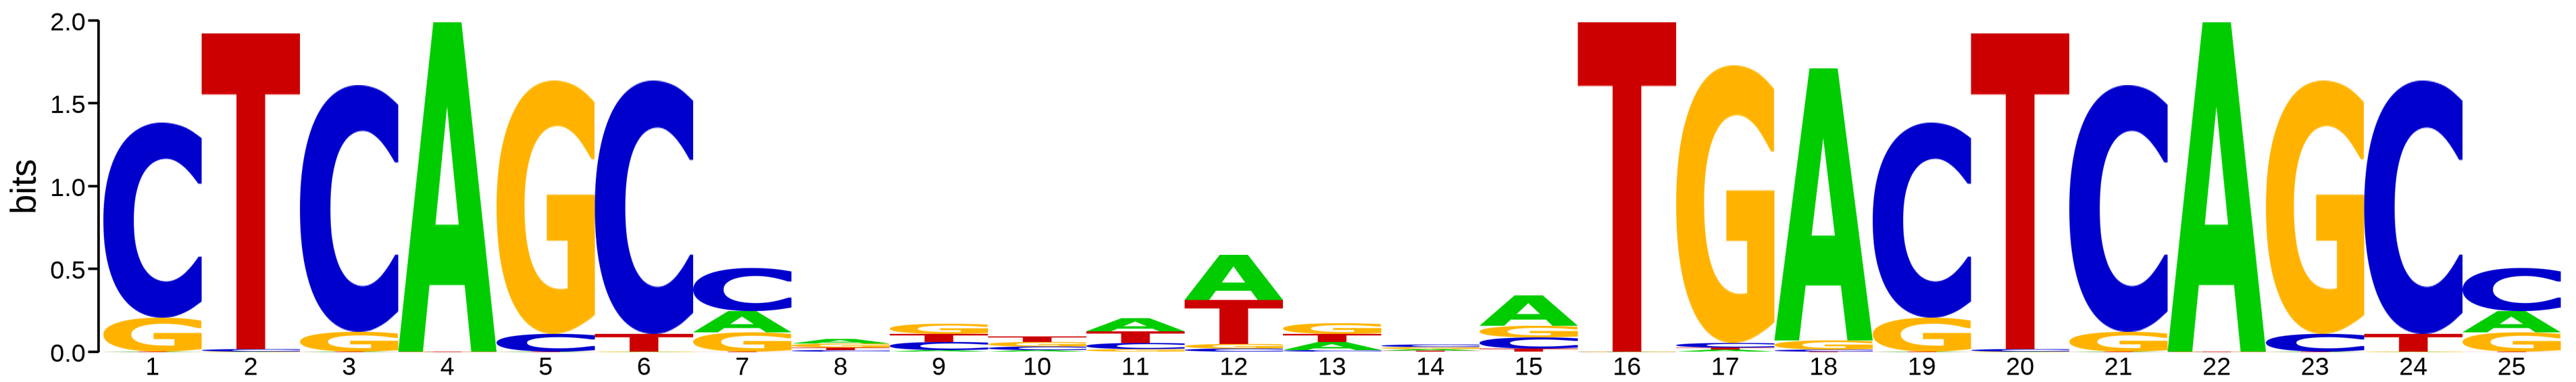

In [59]:
Image(output_folder+"motif_kernel_17.png")

It looks very clear that these are the motifs as they occur very frequently in class 1!
### Therefore the motif is: GACTCAGC---------TGACTCAG where '-' represents anything.

Now we want to see the positions in which these occured in class 1. So we look at the second layer of our CNN to see where Kernel 8 and Kernel 17 occured the most in Classes 0 and 1. 


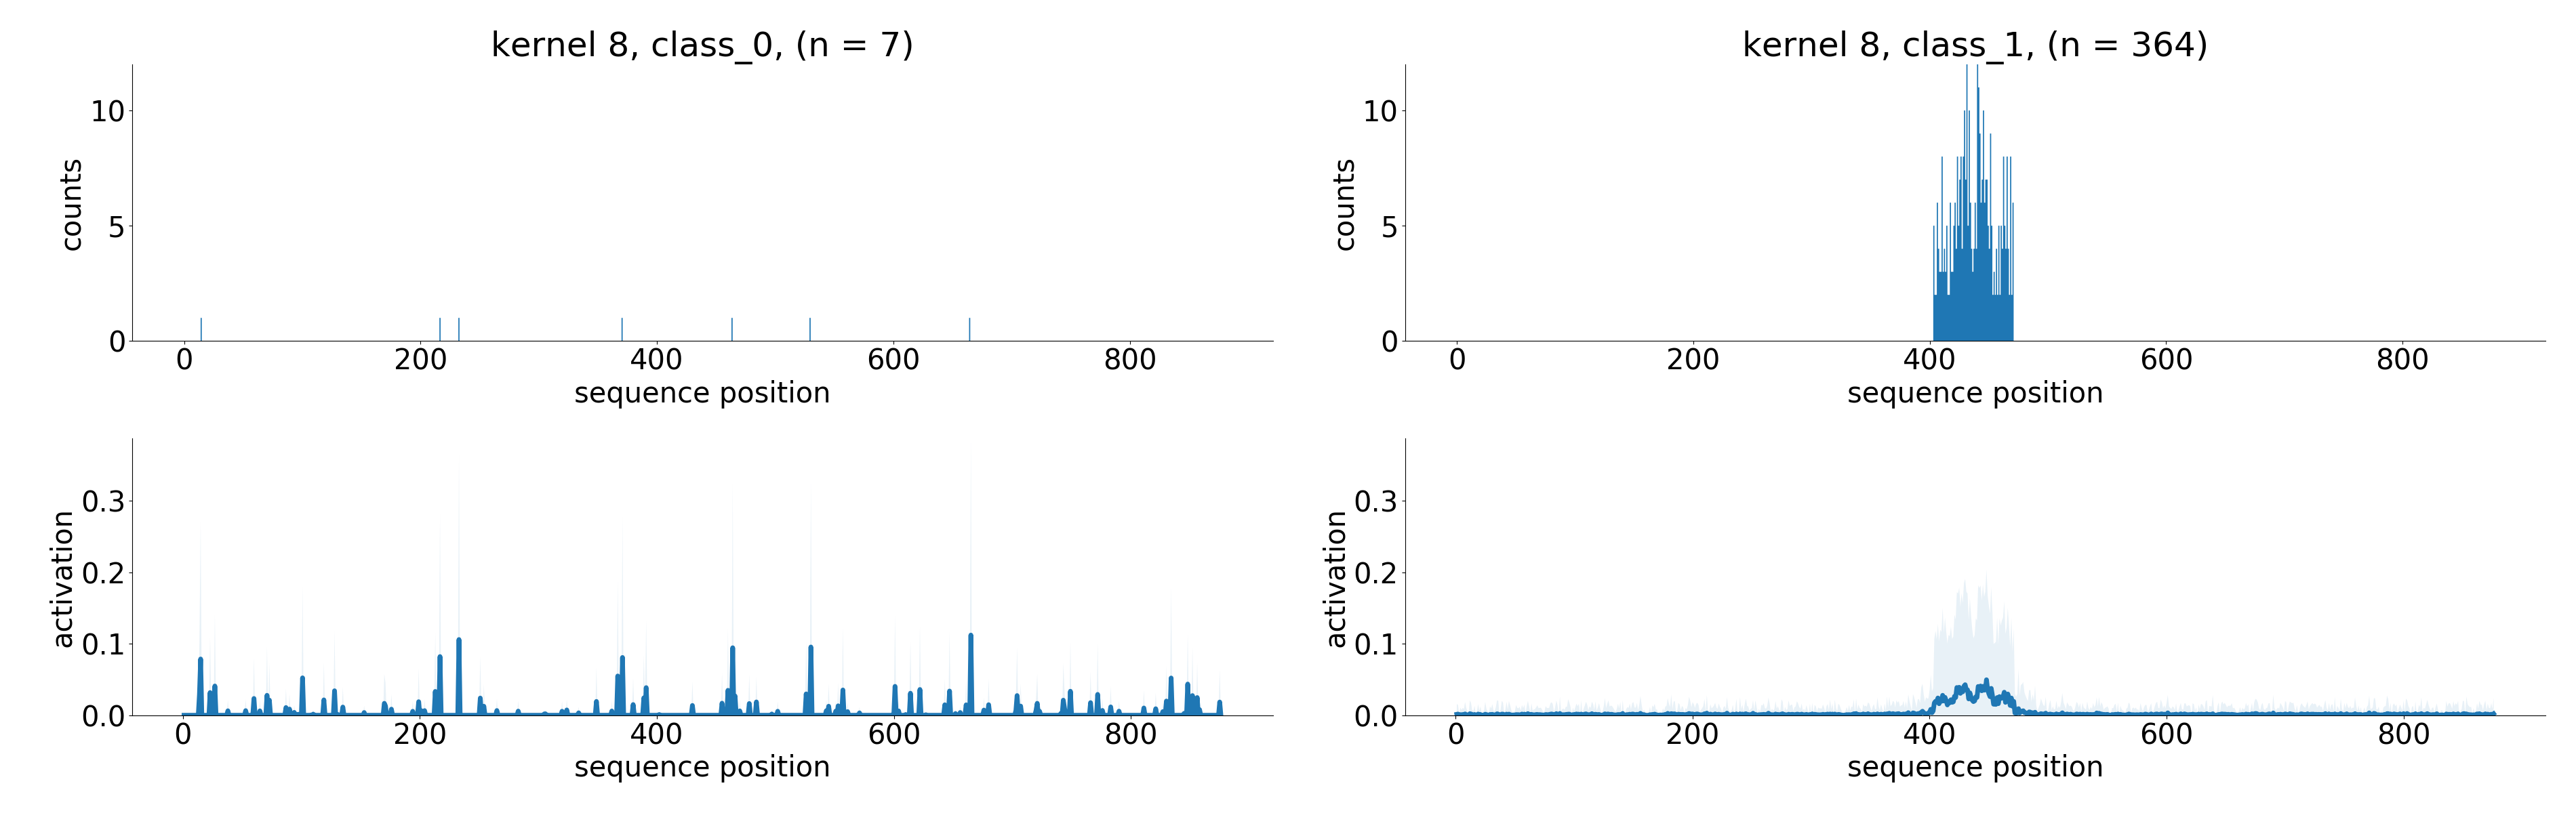

In [60]:
Image(output_folder+"position_kernel_8.png")

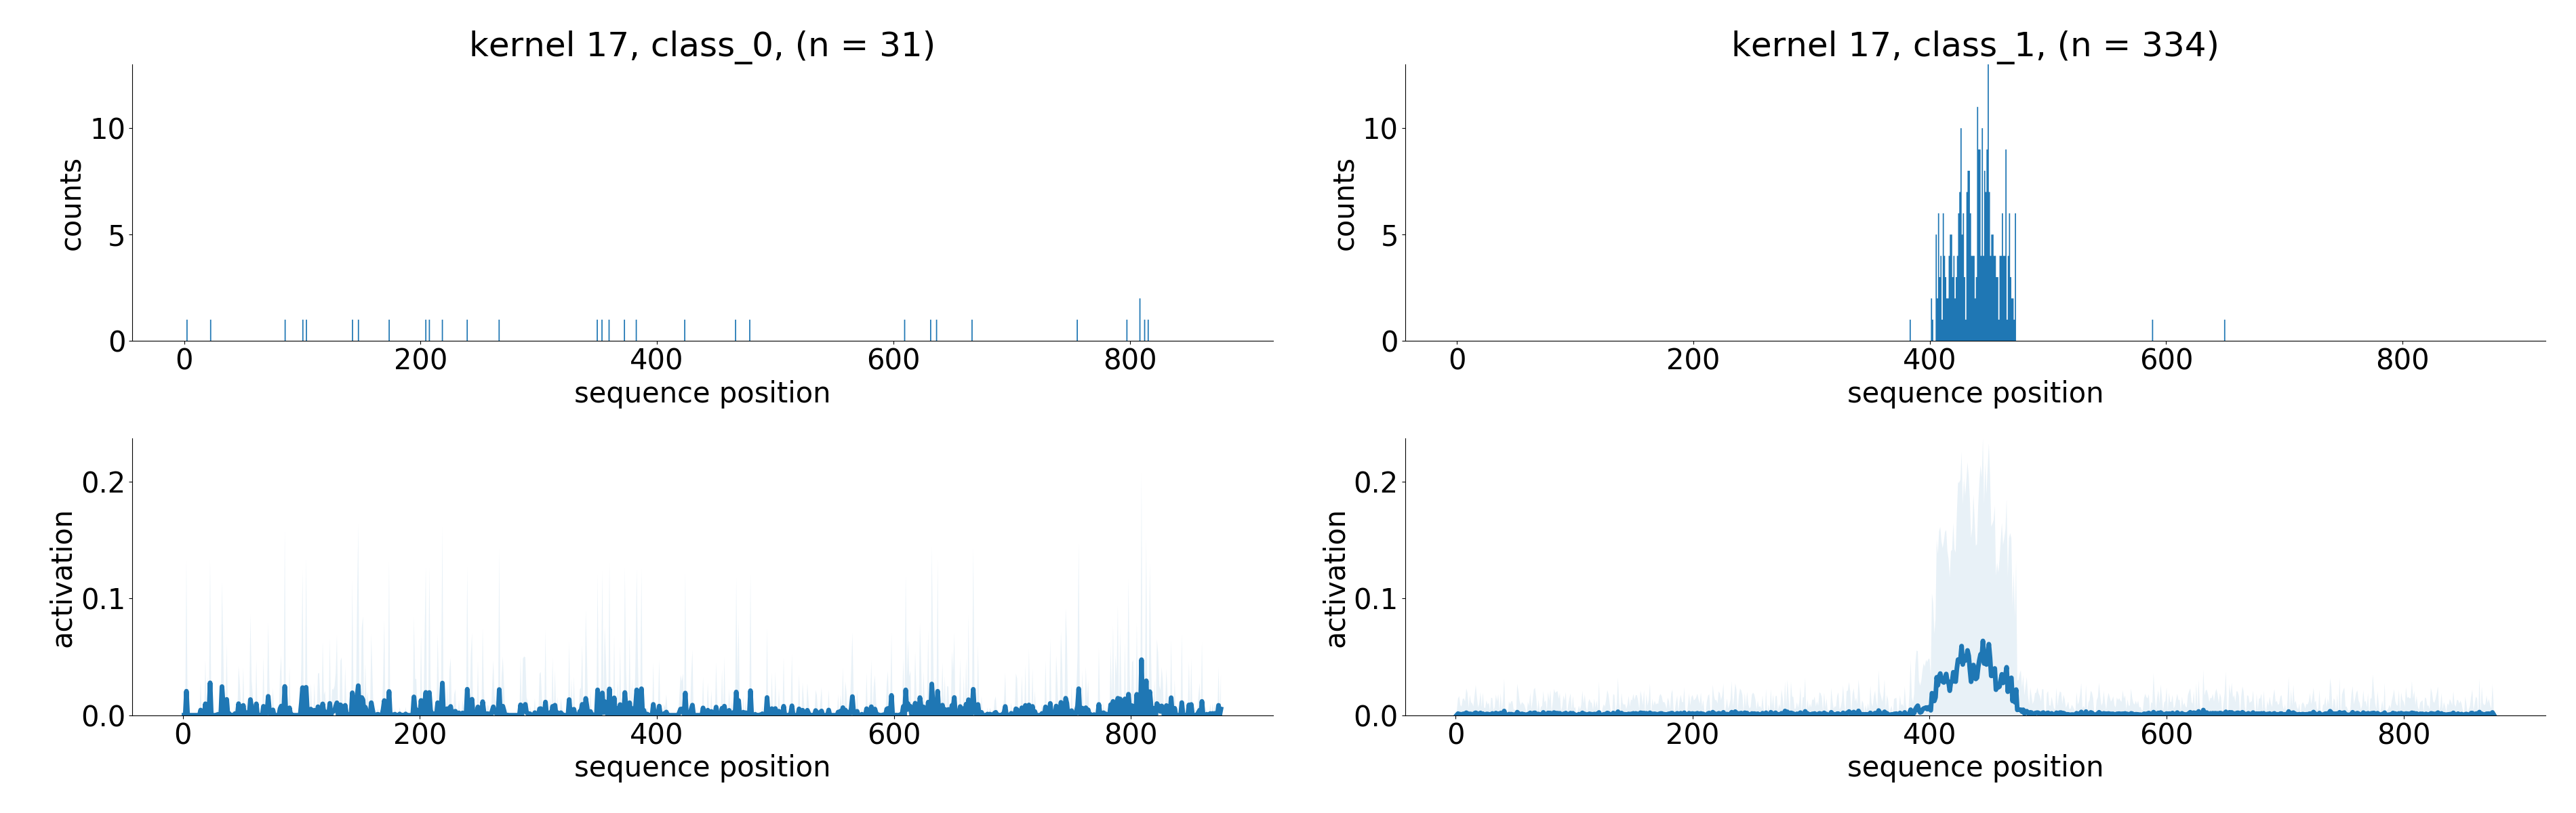

In [61]:
Image(output_folder+"position_kernel_17.png")

Sure enough, they all occur at nearly the same position in class 1, but are spread out in class 0! The motifs seem to occur close to each other in this region.

### The motif occurs repeatedly between positions 400-500 in class 1 sequences

## Writing the test_data into an object and making predictions

In [17]:
test_data_list = []
with open("data/allData_tst.txt") as f:
    lines = f.readlines()
    for line in lines:
        test_data_list.append(">h\n")
        test_data_list.append(line)

In [18]:
with open("data/fasta_test.txt", "w") as f:
    f.writelines(test_data_list)

In [19]:
test_data = Data(["data/fasta_test.txt"], ("ATGC"))

In [20]:
print(test_data.get_summary())

              class_0
all data:        2000
training:        1400
validation:       300
test:             300


In [21]:
test_prediction_weights = model.predict(test_data, "all")

In [22]:
test_predictions = []
for i in test_prediction_weights:
    if (i[0] > 0.5):
        test_predictions.append("0\n")
    else:
        test_predictions.append("1\n")
        
test_predictions = np.array(test_predictions)

In [23]:
print(test_predictions)

['0\n' '1\n' '0\n' ... '0\n' '1\n' '0\n']


In [24]:
with open("predictions.txt", "w") as f:
    f.writelines(test_predictions)

### Observations and Decisions
- CNN's unlike a lot of Neural Network models give us very human-interpretable results
- They help find important features. 
- The motif seems to be pallindromic(not in the biological sense, but in the computer science sense)
- CNN's would perform better than RNN's because we are looking for specific small subsequences within a sequence. 